<a href="https://colab.research.google.com/github/T1anq1/Data-Science-Projects/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain openai pandas chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 22.8 MB/s e

In [ ]:
!pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 277.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files

files.download('libertarian_keyword_trend.png')

In [ ]:
# Install necessary libraries
!pip install sentence-transformers pandas numpy tqdm

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm
from time import time

# Load your data
print("Loading data...")
wired_df = pd.read_csv('processed_articles.csv')
mj_df = pd.read_csv('processed_mother_jones_articles.csv')

# Combine the dataframes and add a 'source' column
wired_df['source'] = 'Wired'
mj_df['source'] = 'Mother Jones'
combined_df = pd.concat([wired_df, mj_df], ignore_index=True)

# Clean the data
print("Cleaning data...")
combined_df['processed_text'] = combined_df['processed_text'].fillna('')  # Replace NaN with empty string
combined_df['processed_text'] = combined_df['processed_text'].astype(str)  # Convert all to string

# Remove any rows where processed_text is empty after cleaning
combined_df = combined_df[combined_df['processed_text'] != '']

print(f"Total articles after cleaning: {len(combined_df)}")
print(f"Wired articles: {len(combined_df[combined_df['source'] == 'Wired'])}")
print(f"Mother Jones articles: {len(combined_df[combined_df['source'] == 'Mother Jones'])}")

# Load a local embedding model
print("Loading the model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
print("Generating embeddings... This may take a while.")
start_time = time()
embeddings = model.encode(combined_df['processed_text'].tolist(), show_progress_bar=True)
print(f"Time taken: {time() - start_time:.2f} seconds")

# Print the shape of the embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Simple similarity search function
def find_most_similar(query, embeddings, texts, sources):
    query_embedding = model.encode([query])[0]
    similarities = [np.dot(query_embedding, emb) / (np.linalg.norm(query_embedding) * np.linalg.norm(emb)) for emb in embeddings]
    most_similar_idx = np.argmax(similarities)
    return texts[most_similar_idx], sources[most_similar_idx], similarities[most_similar_idx]

# Example queries
queries = [
    "How does technology relate to personal freedom?",
    "What are the libertarian views on government regulation?",
    "How do digital rights intersect with libertarian philosophy?"
]

print("\nRunning example queries:")
for query in queries:
    most_similar_text, source, similarity = find_most_similar(query, embeddings, combined_df['processed_text'].tolist(), combined_df['source'].tolist())
    print(f"\nQuery: {query}")
    print(f"Most similar text from {source}:")
    print(most_similar_text[:200] + "...") # Print first 200 characters
    print(f"Similarity score: {similarity:.4f}")

# Save embeddings to file
print("\nSaving embeddings to file...")
np.save('article_all_embeddings.npy', embeddings)
combined_df.to_csv('combined_all_articles.csv', index=False)
print("Embeddings and combined dataframe saved.")

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Loading data...
Cleaning data...
Total articles after cleaning: 7112
Wired articles: 5341
Mother Jones articles: 1771
Loading the model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings... This may take a while.


Batches:   0%|          | 0/223 [00:00<?, ?it/s]

Time taken: 220.05 seconds
Shape of embeddings: (7112, 384)

Running example queries:

Query: How does technology relate to personal freedom?
Most similar text from Wired:
tech fear government fine noncontingent worker accountability china amount fear essential upcoming gem phone feature slim form factor coating radical ui company run man paid leave google wake sexual a...
Similarity score: 0.3473

Query: What are the libertarian views on government regulation?
Most similar text from Mother Jones:
fed fed good news legislature already passed law declaring sovereign governor actually signed bill law meanwhile lawmaker passed measure nullify federal health care reform law may source tenth amendme...
Similarity score: 0.3332

Query: How do digital rights intersect with libertarian philosophy?
Most similar text from Mother Jones:
remix making art commerce thrive hybrid economy lawrence lessig penguin press criminal watch clip tv show youtube grab rihanna lime wire post myspace page file sh

Loading data...
Columns in Wired dataset: ['Title', 'Author', 'Abstract', 'Publication Title', 'Volume', 'Issue', 'Publication Date', 'ISSN', 'e-ISSN', 'URL', 'processed_text']
Columns in Mother Jones dataset: ['Title', 'Author', 'Abstract', 'Publication Title', 'Volume', 'Issue', 'Publication Date', 'ISSN', 'e-ISSN', 'URL', 'YearMonth', 'processed_text']
Cleaning data...
Total articles after cleaning: 6704
Wired articles: 4933
Mother Jones articles: 1771
Creating embeddings... This may take a while.


<ipython-input-2-1d80398bd2b4>:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'], errors='coerce')


Batches:   0%|          | 0/210 [00:00<?, ?it/s]

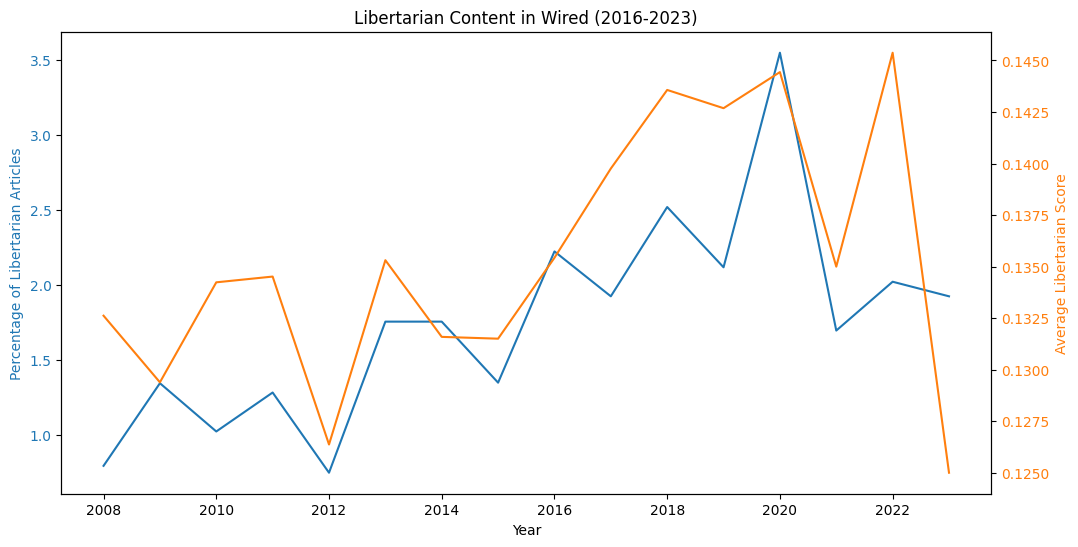


Yearly statistics for Wired:
    Publication Date  is_libertarian  libertarian_score
0               2008        0.007937           0.132624
1               2009        0.013441           0.129394
2               2010        0.010225           0.134243
3               2011        0.012821           0.134522
4               2012        0.007477           0.126379
5               2013        0.017544           0.135315
6               2014        0.017544           0.131597
7               2015        0.013477           0.131510
8               2016        0.022222           0.135434
9               2017        0.019231           0.139760
10              2018        0.025180           0.143571
11              2019        0.021164           0.142687
12              2020        0.035461           0.144438
13              2021        0.016949           0.135003
14              2022        0.020202           0.145377
15              2023        0.019231           0.125010

Most libertarian 

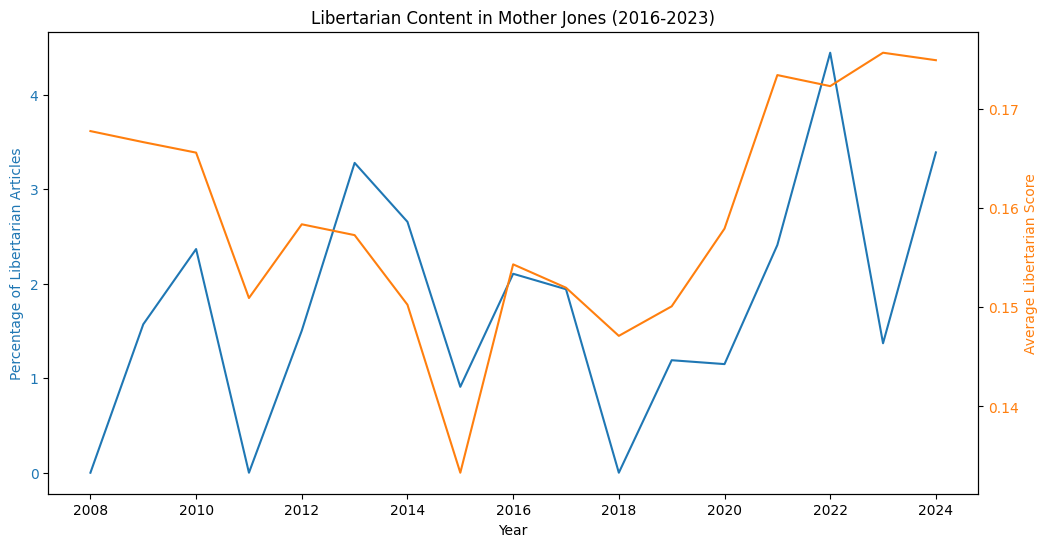


Yearly statistics for Mother Jones:
    Publication Date  is_libertarian  libertarian_score
0               2008        0.000000           0.167778
1               2009        0.015707           0.166664
2               2010        0.023669           0.165605
3               2011        0.000000           0.150935
4               2012        0.015038           0.158375
5               2013        0.032787           0.157281
6               2014        0.026549           0.150258
7               2015        0.009091           0.133309
8               2016        0.021053           0.154332
9               2017        0.019417           0.151976
10              2018        0.000000           0.147118
11              2019        0.011905           0.150097
12              2020        0.011494           0.157938
13              2021        0.024096           0.173430
14              2022        0.044444           0.172315
15              2023        0.013699           0.175685
16         

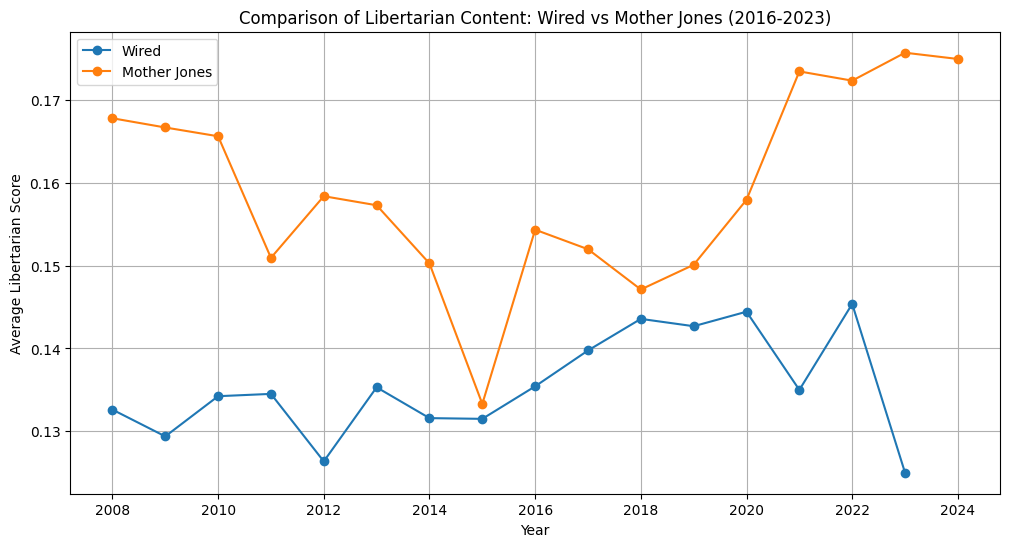


Comparison of average libertarian scores:
                     Wired  Mother Jones
Publication Date                        
2008              0.132624      0.167778
2009              0.129394      0.166664
2010              0.134243      0.165605
2011              0.134522      0.150935
2012              0.126379      0.158375
2013              0.135315      0.157281
2014              0.131597      0.150258
2015              0.131510      0.133309
2016              0.135434      0.154332
2017              0.139760      0.151976
2018              0.143571      0.147118
2019              0.142687      0.150097
2020              0.144438      0.157938
2021              0.135003      0.173430
2022              0.145377      0.172315
2023              0.125010      0.175685
2024                   NaN      0.174931


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# File paths
WIRED_CSV_PATH = 'processed_articles.csv'
MJ_CSV_PATH = 'processed_mother_jones_articles.csv'

# Load the data
print("Loading data...")
wired_df = pd.read_csv(WIRED_CSV_PATH)
mj_df = pd.read_csv(MJ_CSV_PATH)

# Print column names
print("Columns in Wired dataset:", wired_df.columns.tolist())
print("Columns in Mother Jones dataset:", mj_df.columns.tolist())

# Combine the dataframes and add a 'source' column
wired_df['source'] = 'Wired'
mj_df['source'] = 'Mother Jones'
combined_df = pd.concat([wired_df, mj_df], ignore_index=True)

# Clean the data
print("Cleaning data...")
combined_df['processed_text'] = combined_df['processed_text'].fillna('')
combined_df['processed_text'] = combined_df['processed_text'].astype(str)
combined_df = combined_df[combined_df['processed_text'] != '']

# Convert 'Publication Date' to datetime
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'], errors='coerce')

# Drop rows with NaT in 'Publication Date'
combined_df = combined_df.dropna(subset=['Publication Date'])

print(f"Total articles after cleaning: {len(combined_df)}")
print(f"Wired articles: {len(combined_df[combined_df['source'] == 'Wired'])}")
print(f"Mother Jones articles: {len(combined_df[combined_df['source'] == 'Mother Jones'])}")

# Create embeddings
print("Creating embeddings... This may take a while.")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(combined_df['processed_text'].tolist(), show_progress_bar=True)

# Define libertarian-related queries
libertarian_queries = [
    "libertarianism", "individual freedom", "free market", "minimal government",
    "personal liberty", "economic freedom", "voluntary association",
    "property rights", "deregulation", "civil liberties"
]

# Encode the queries and calculate similarity scores
query_embeddings = model.encode(libertarian_queries)
similarities = cosine_similarity(embeddings, query_embeddings)
combined_df['libertarian_score'] = similarities.max(axis=1)

# Set a threshold for considering an article as libertarian-related
threshold = 0.3
combined_df['is_libertarian'] = combined_df['libertarian_score'] > threshold

# Function to analyze and plot results for a specific source
def analyze_source(df, source_name):
    source_df = df[df['source'] == source_name]

    # Group by year and calculate the percentage of libertarian articles
    yearly_stats = source_df.groupby(source_df['Publication Date'].dt.year).agg({
        'is_libertarian': 'mean',
        'libertarian_score': 'mean'
    }).reset_index()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage of Libertarian Articles', color='tab:blue')
    ax1.plot(yearly_stats['Publication Date'], yearly_stats['is_libertarian'] * 100, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Libertarian Score', color='tab:orange')
    ax2.plot(yearly_stats['Publication Date'], yearly_stats['libertarian_score'], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Libertarian Content in {source_name} (2016-2023)')
    plt.show()

    print(f"\nYearly statistics for {source_name}:")
    print(yearly_stats)

    # Find the most libertarian article for each year
    for year in range(2008, 2024):
        year_df = source_df[source_df['Publication Date'].dt.year == year]
        if not year_df.empty:
            most_libertarian = year_df.loc[year_df['libertarian_score'].idxmax()]
            print(f"\nMost libertarian article in {year}:")
            print(f"Date: {most_libertarian['Publication Date'].strftime('%Y-%m-%d')}")
            print(f"Score: {most_libertarian['libertarian_score']:.4f}")
            print(f"Snippet: {most_libertarian['processed_text'][:200]}...")

# Analyze both sources
analyze_source(combined_df, 'Wired')
analyze_source(combined_df, 'Mother Jones')

# Compare Wired and Mother Jones
wired_yearly = combined_df[combined_df['source'] == 'Wired'].groupby(combined_df['Publication Date'].dt.year)['libertarian_score'].mean()
mj_yearly = combined_df[combined_df['source'] == 'Mother Jones'].groupby(combined_df['Publication Date'].dt.year)['libertarian_score'].mean()

plt.figure(figsize=(12, 6))
plt.plot(wired_yearly.index, wired_yearly.values, label='Wired', marker='o')
plt.plot(mj_yearly.index, mj_yearly.values, label='Mother Jones', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Libertarian Score')
plt.title('Comparison of Libertarian Content: Wired vs Mother Jones (2016-2023)')
plt.legend()
plt.grid(True)
plt.show()

print("\nComparison of average libertarian scores:")
comparison_df = pd.DataFrame({'Wired': wired_yearly, 'Mother Jones': mj_yearly})
print(comparison_df)

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the cleaned combined dataframe
combined_df = pd.read_csv('combined_cleaned.csv')

# Create embeddings
print("Creating embeddings... This may take a while.")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(combined_df['processed_text'].tolist(), show_progress_bar=True)

# Define libertarian-related queries
libertarian_queries = [
    "libertarianism", "individual freedom", "free market", "minimal government",
    "personal liberty", "economic freedom", "voluntary association",
    "property rights", "deregulation", "civil liberties"
]

# Encode the queries and calculate similarity scores
query_embeddings = model.encode(libertarian_queries)
similarities = cosine_similarity(embeddings, query_embeddings)
combined_df['libertarian_score'] = similarities.max(axis=1)

# Set a threshold for considering an article as libertarian-related
threshold = 0.3
combined_df['is_libertarian'] = combined_df['libertarian_score'] > threshold

# Save the combined dataframe with scores for later use
combined_df.to_csv('combined_with_scores.csv', index=False)

Creating embeddings... This may take a while.


Batches:   0%|          | 0/210 [00:00<?, ?it/s]

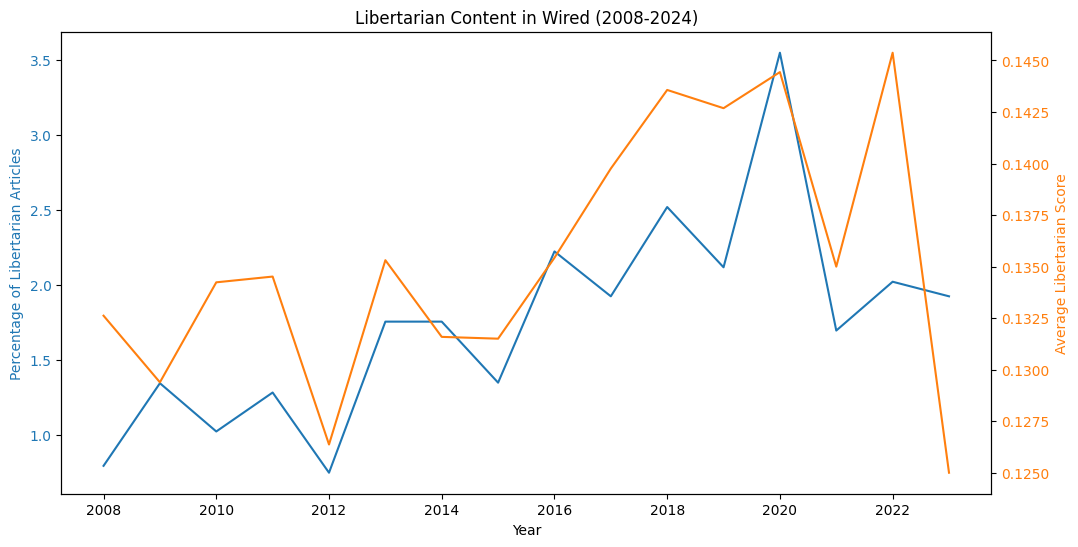


Yearly statistics for Wired:
    Publication Date  is_libertarian  libertarian_score
0               2008        0.007937           0.132624
1               2009        0.013441           0.129394
2               2010        0.010225           0.134243
3               2011        0.012821           0.134522
4               2012        0.007477           0.126379
5               2013        0.017544           0.135315
6               2014        0.017544           0.131597
7               2015        0.013477           0.131510
8               2016        0.022222           0.135434
9               2017        0.019231           0.139760
10              2018        0.025180           0.143571
11              2019        0.021164           0.142687
12              2020        0.035461           0.144438
13              2021        0.016949           0.135003
14              2022        0.020202           0.145377
15              2023        0.019231           0.125010

Most libertarian 

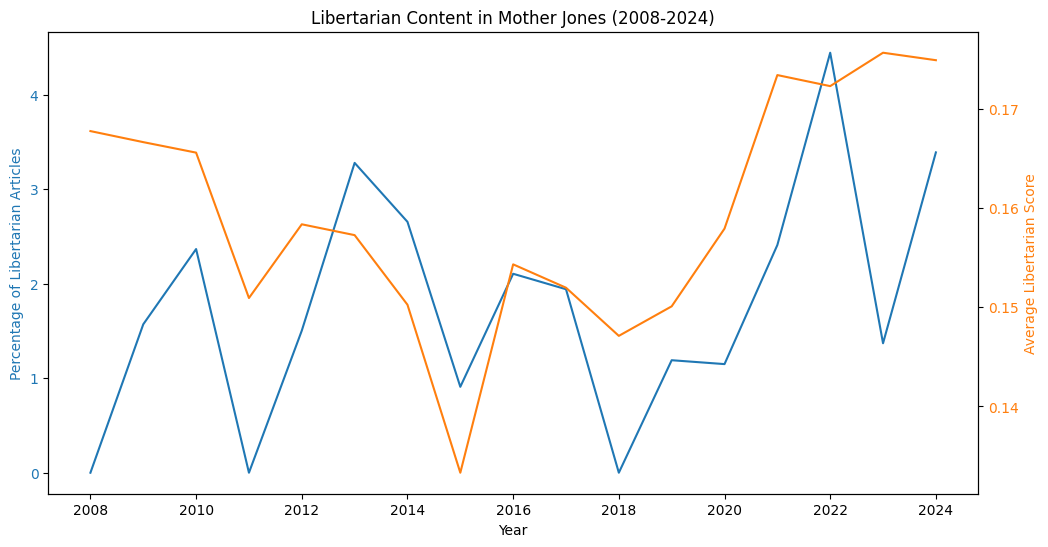


Yearly statistics for Mother Jones:
    Publication Date  is_libertarian  libertarian_score
0               2008        0.000000           0.167778
1               2009        0.015707           0.166664
2               2010        0.023669           0.165605
3               2011        0.000000           0.150935
4               2012        0.015038           0.158375
5               2013        0.032787           0.157281
6               2014        0.026549           0.150258
7               2015        0.009091           0.133309
8               2016        0.021053           0.154332
9               2017        0.019417           0.151976
10              2018        0.000000           0.147118
11              2019        0.011905           0.150097
12              2020        0.011494           0.157938
13              2021        0.024096           0.173430
14              2022        0.044444           0.172315
15              2023        0.013699           0.175685
16         

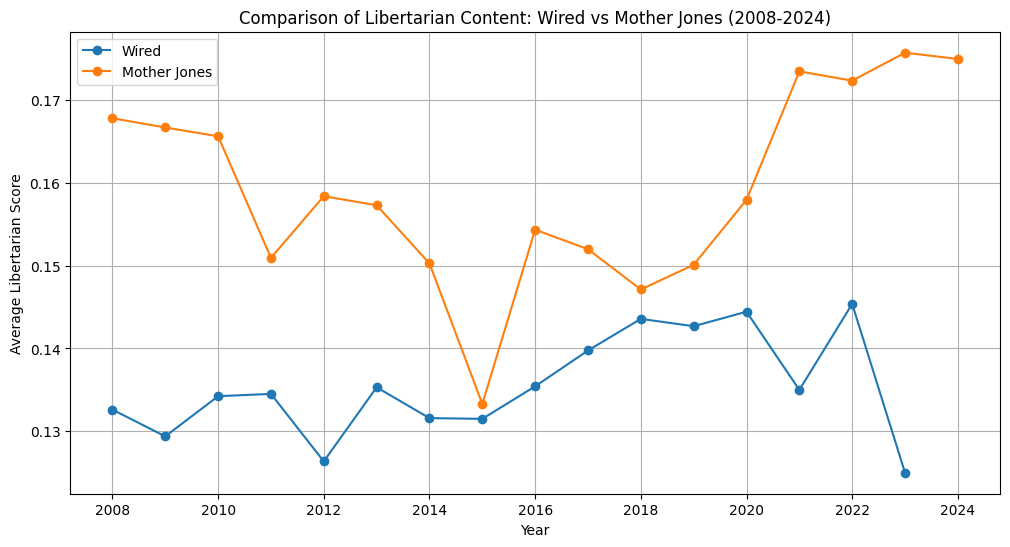


Comparison of average libertarian scores:
                     Wired  Mother Jones
Publication Date                        
2008              0.132624      0.167778
2009              0.129394      0.166664
2010              0.134243      0.165605
2011              0.134522      0.150935
2012              0.126379      0.158375
2013              0.135315      0.157281
2014              0.131597      0.150258
2015              0.131510      0.133309
2016              0.135434      0.154332
2017              0.139760      0.151976
2018              0.143571      0.147118
2019              0.142687      0.150097
2020              0.144438      0.157938
2021              0.135003      0.173430
2022              0.145377      0.172315
2023              0.125010      0.175685
2024                   NaN      0.174931


In [ ]:
import matplotlib.pyplot as plt

# Load the combined dataframe with scores
combined_df = pd.read_csv('combined_with_scores.csv')
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'])

# Function to analyze and plot results for a specific source
def analyze_source(df, source_name):
    source_df = df[df['source'] == source_name]

    # Group by year and calculate the percentage of libertarian articles
    yearly_stats = source_df.groupby(source_df['Publication Date'].dt.year).agg({
        'is_libertarian': 'mean',
        'libertarian_score': 'mean'
    }).reset_index()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage of Libertarian Articles', color='tab:blue')
    ax1.plot(yearly_stats['Publication Date'], yearly_stats['is_libertarian'] * 100, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Libertarian Score', color='tab:orange')
    ax2.plot(yearly_stats['Publication Date'], yearly_stats['libertarian_score'], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Libertarian Content in {source_name} (2008-2024)')
    plt.show()

    print(f"\nYearly statistics for {source_name}:")
    print(yearly_stats)

    # Find the most libertarian article for each year
    for year in range(2008, 2024):
        year_df = source_df[source_df['Publication Date'].dt.year == year]
        if not year_df.empty:
            most_libertarian = year_df.loc[year_df['libertarian_score'].idxmax()]
            print(f"\nMost libertarian article in {year}:")
            print(f"Date: {most_libertarian['Publication Date'].strftime('%Y-%m-%d')}")
            print(f"Score: {most_libertarian['libertarian_score']:.4f}")
            print(f"Snippet: {most_libertarian['processed_text'][:200]}...")

# Analyze both sources
analyze_source(combined_df, 'Wired')
analyze_source(combined_df, 'Mother Jones')

# Compare Wired and Mother Jones
wired_yearly = combined_df[combined_df['source'] == 'Wired'].groupby(combined_df['Publication Date'].dt.year)['libertarian_score'].mean()
mj_yearly = combined_df[combined_df['source'] == 'Mother Jones'].groupby(combined_df['Publication Date'].dt.year)['libertarian_score'].mean()

plt.figure(figsize=(12, 6))
plt.plot(wired_yearly.index, wired_yearly.values, label='Wired', marker='o')
plt.plot(mj_yearly.index, mj_yearly.values, label='Mother Jones', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Libertarian Score')
plt.title('Comparison of Libertarian Content: Wired vs Mother Jones (2008-2024)')
plt.legend()
plt.grid(True)
plt.show()

print("\nComparison of average libertarian scores:")
comparison_df = pd.DataFrame({'Wired': wired_yearly, 'Mother Jones': mj_yearly})
print(comparison_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


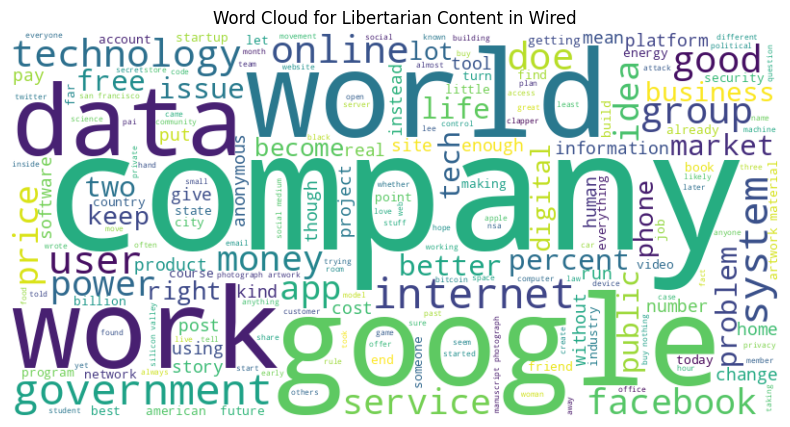

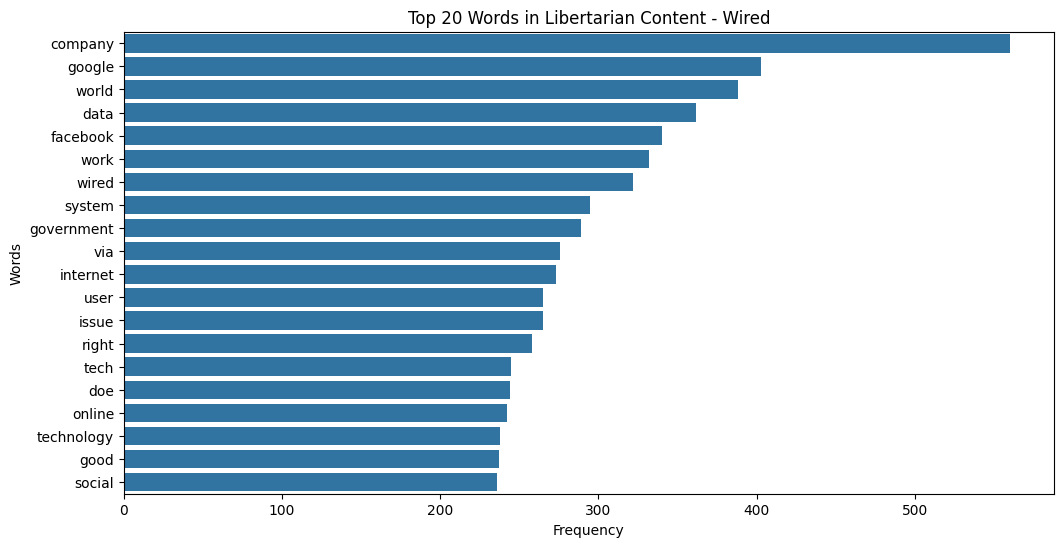

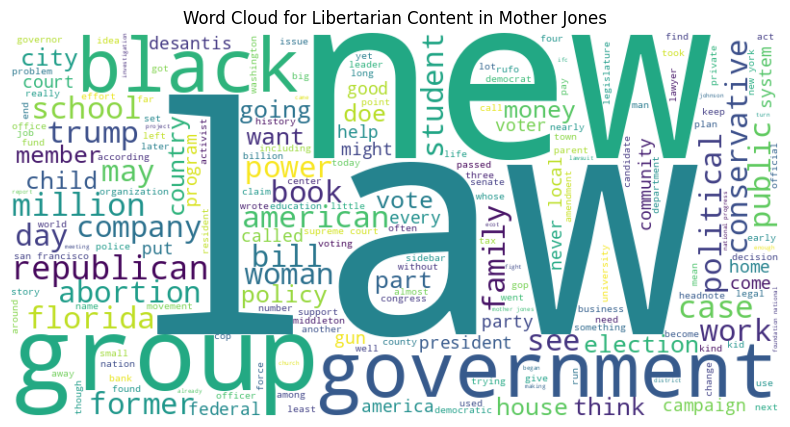

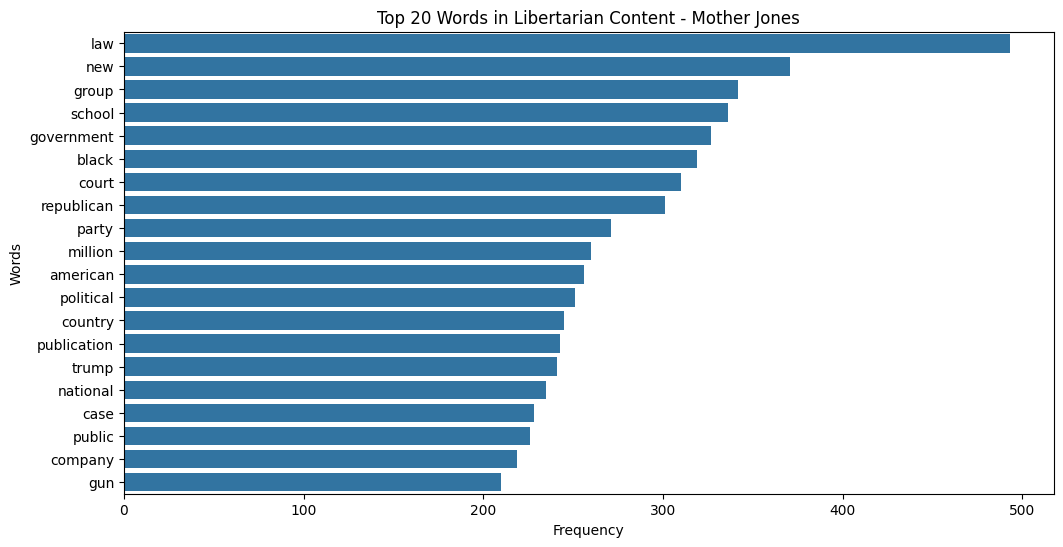

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming combined_df is your dataframe with all the data

def clean_text(text):
    # Remove HTML artifacts
    text = re.sub(r'&amp;', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def preprocess_text(text):
    # Clean the text
    text = clean_text(text)
    # Tokenize the text
    words = nltk.word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    # Add custom stopwords
    custom_stopwords = {'amp', 'lt', 'gt', 'nbsp'}
    stop_words.update(custom_stopwords)
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
    return words

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot_top_words(word_freq, title):
    top_words = dict(word_freq.most_common(20))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), orient='h')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Analyze words for each publication
for source in ['Wired', 'Mother Jones']:
    # Filter for articles with high libertarian scores (e.g., top 10%)
    source_df = combined_df[combined_df['source'] == source]
    threshold = source_df['libertarian_score'].quantile(0.9)
    high_libertarian_df = source_df[source_df['libertarian_score'] >= threshold]

    # Combine all text from high libertarian articles
    all_text = ' '.join(high_libertarian_df['processed_text'])

    # Preprocess the text
    cleaned_text = ' '.join(preprocess_text(all_text))

    # Generate and plot word cloud
    generate_word_cloud(cleaned_text, f'Word Cloud for Libertarian Content in {source}')

    # Get word frequencies
    word_freq = Counter(preprocess_text(all_text))

    # Plot top words
    plot_top_words(word_freq, f'Top 20 Words in Libertarian Content - {source}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


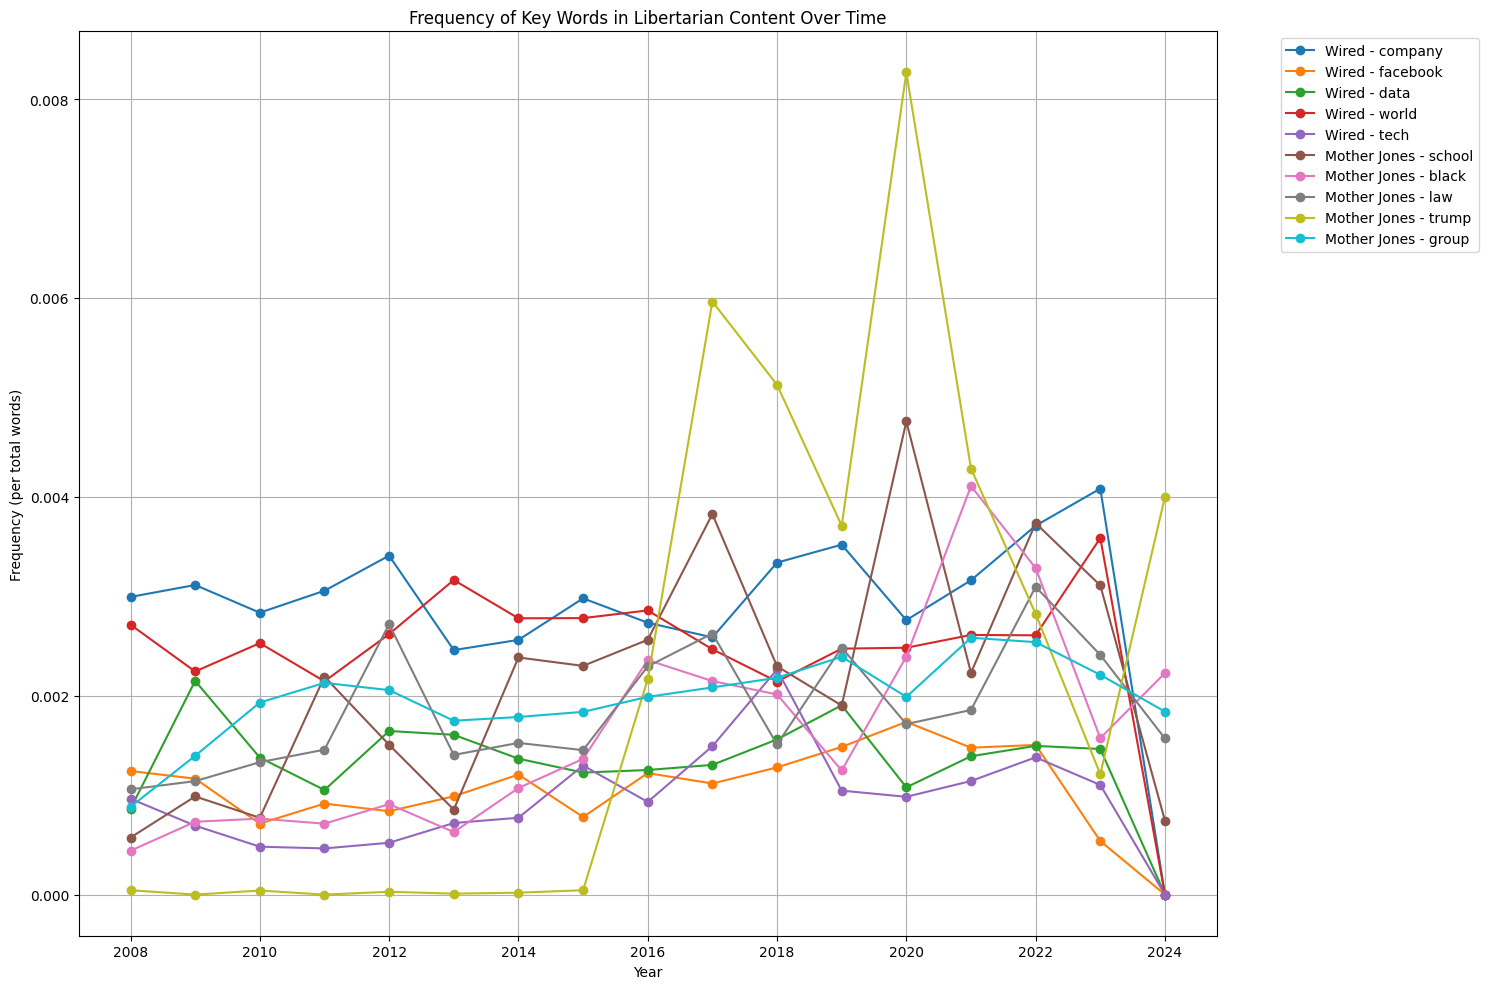

Percentage change in keyword frequency from 2008 to 2023:

Wired:
company: 36.40%
facebook: -56.66%
data: 69.83%
world: 32.12%
tech: 14.40%

Mother Jones:
school: 442.15%
black: 256.64%
law: 127.62%
trump: 2645.58%
group: 150.50%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming combined_df is your dataframe with all the data

def clean_text(text):
    # Remove HTML artifacts
    text = re.sub(r'&amp;', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def preprocess_text(text):
    # Clean the text
    text = clean_text(text)
    # Tokenize the text
    words = nltk.word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    # Add custom stopwords
    custom_stopwords = {'amp', 'lt', 'gt', 'nbsp'}
    stop_words.update(custom_stopwords)
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
    return words

# Select key words for each publication based on the previous analysis
wired_keywords = ['company', 'facebook', 'data', 'world', 'tech']
mj_keywords = ['school', 'black', 'law', 'trump', 'group']

# Function to count keyword occurrences
def count_keywords(text, keywords):
    words = preprocess_text(text)
    return sum(word in keywords for word in words)

# Prepare data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Calculate keyword frequencies for each year and publication
results = []
for source in ['Wired', 'Mother Jones']:
    source_df = combined_df[combined_df['source'] == source]
    keywords = wired_keywords if source == 'Wired' else mj_keywords

    for year in range(2008, 2025):
        year_df = source_df[source_df['year'] == year]
        total_words = sum(len(preprocess_text(text)) for text in year_df['processed_text'])
        for keyword in keywords:
            count = sum(count_keywords(text, [keyword]) for text in year_df['processed_text'])
            frequency = count / total_words if total_words > 0 else 0
            results.append({'source': source, 'year': year, 'keyword': keyword, 'frequency': frequency})

result_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(15, 10))
for source in ['Wired', 'Mother Jones']:
    source_data = result_df[result_df['source'] == source]
    for keyword in (wired_keywords if source == 'Wired' else mj_keywords):
        keyword_data = source_data[source_data['keyword'] == keyword]
        plt.plot(keyword_data['year'], keyword_data['frequency'],
                 marker='o', label=f"{source} - {keyword}")

plt.title('Frequency of Key Words in Libertarian Content Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency (per total words)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Calculate and print the percentage change for each keyword from 2008 to 2023
print("Percentage change in keyword frequency from 2008 to 2023:")
for source in ['Wired', 'Mother Jones']:
    print(f"\n{source}:")
    source_data = result_df[result_df['source'] == source]
    keywords = wired_keywords if source == 'Wired' else mj_keywords
    for keyword in keywords:
        keyword_data = source_data[source_data['keyword'] == keyword]
        start_freq = keyword_data[keyword_data['year'] == 2008]['frequency'].values[0]
        end_freq = keyword_data[keyword_data['year'] == 2023]['frequency'].values[0]
        percent_change = ((end_freq - start_freq) / start_freq) * 100
        print(f"{keyword}: {percent_change:.2f}%")

In [ ]:
import pandas as pd
import re
from collections import defaultdict

def extract_sentences(text, keyword):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [sentence for sentence in sentences if keyword.lower() in sentence.lower()]

def analyze_keyword_context(df, keywords):
    results = defaultdict(lambda: defaultdict(list))
    for _, row in df.iterrows():
        for keyword in keywords:
            sentences = extract_sentences(row['processed_text'], keyword)
            for sentence in sentences:
                results[row['source']][keyword].append(sentence)
    return results

# Assuming combined_df is your dataframe with all the data
libertarian_keywords = ['freedom', 'liberty', 'individual', 'rights', 'regulation', 'market']

context_results = analyze_keyword_context(combined_df, libertarian_keywords)

# Print a sample of contexts for each keyword in each publication
for source in context_results:
    print(f"\nAnalysis for {source}:")
    for keyword in libertarian_keywords:
        print(f"\n  Contexts for '{keyword}':")
        for sentence in context_results[source][keyword][:3]:  # Print first 3 examples
            print(f"    - {sentence}")

# Analyze frequency and co-occurrence
for source in context_results:
    print(f"\nKeyword frequency in {source}:")
    for keyword in libertarian_keywords:
        frequency = len(context_results[source][keyword])
        print(f"  {keyword}: {frequency}")

    # Simple co-occurrence analysis
    print(f"\nCommon co-occurrences in {source}:")
    for i, keyword1 in enumerate(libertarian_keywords):
        for keyword2 in libertarian_keywords[i+1:]:
            co_occurrences = sum(1 for sent in context_results[source][keyword1] if keyword2 in sent.lower())
            if co_occurrences > 0:
                print(f"  {keyword1} & {keyword2}: {co_occurrences}")


Analysis for Wired:

  Contexts for 'freedom':
    - living number good math geek reader july issue report living number tracking personal stats pursuit better health agree motivation factor recording stuff wrote online commenter lost pound building web site track weight food intake sleep forth confronted progress either give mental boost done kick backside put effort appetite data somehow lower premium write jingo short often imperative phrase appears cover serf slogan issue july cover office brainstorm yielded candidate counted number count sum winner story editor jon eilenberg counter culture best jingo month cover send suggestion rant print favorite november cranky reader replacement checker endreplacement checker track personal metric fear brother wo friend anyone fear facebook privacy policy complained chris anderson book always free tried improve beer story showing vast knowledge brewing science objected ad cigarette realize piece singularity university satire number crunchers 

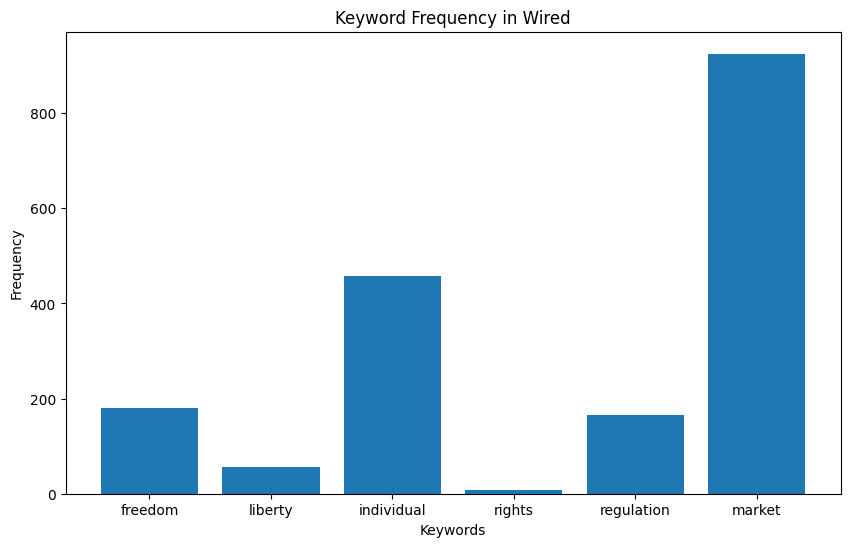

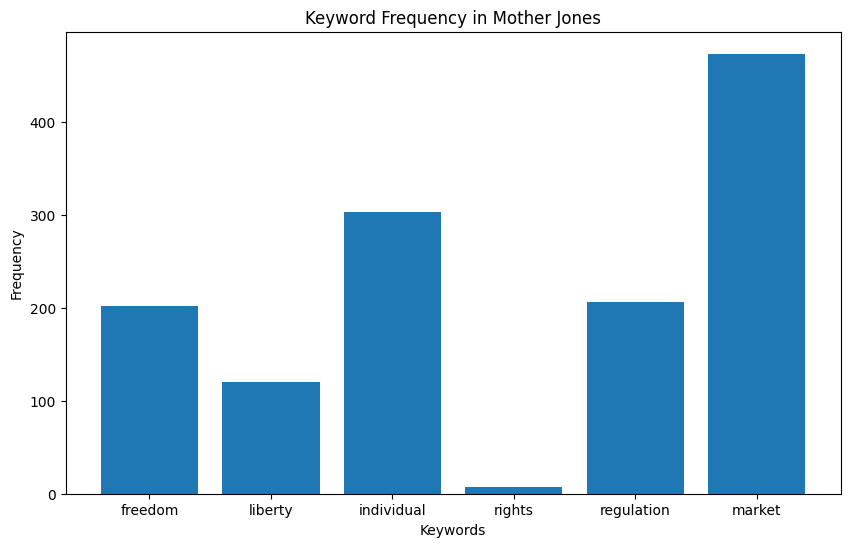

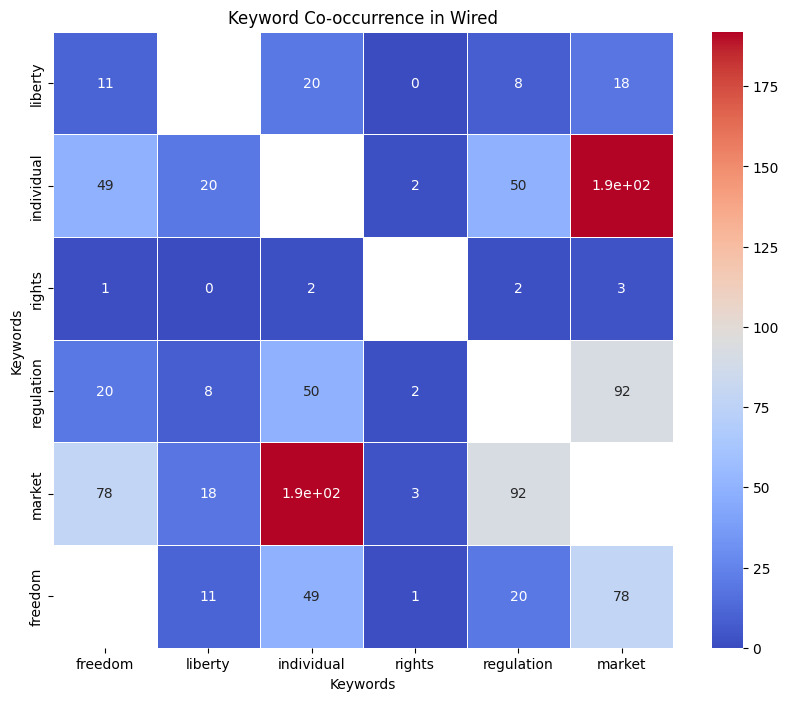

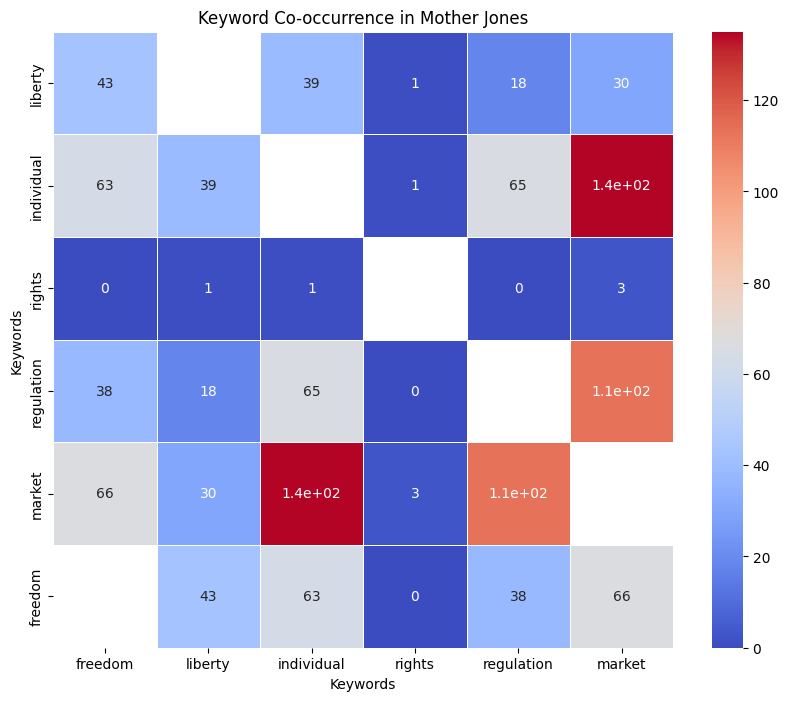

In [ ]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

def extract_sentences(text, keyword):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [sentence for sentence in sentences if keyword.lower() in sentence.lower()]

def analyze_keyword_context(df, keywords):
    results = defaultdict(lambda: defaultdict(list))
    for _, row in df.iterrows():
        for keyword in keywords:
            sentences = extract_sentences(row['processed_text'], keyword)
            for sentence in sentences:
                results[row['source']][keyword].append(sentence)
    return results

# Assuming combined_df is your dataframe with all the data
libertarian_keywords = ['freedom', 'liberty', 'individual', 'rights', 'regulation', 'market']

context_results = analyze_keyword_context(combined_df, libertarian_keywords)

# Calculate keyword frequencies
keyword_frequencies = defaultdict(lambda: defaultdict(int))
for source in context_results:
    for keyword in libertarian_keywords:
        keyword_frequencies[source][keyword] = len(context_results[source][keyword])

# Calculate keyword co-occurrences
keyword_cooccurrences = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
for source in context_results:
    for i, keyword1 in enumerate(libertarian_keywords):
        for keyword2 in libertarian_keywords[i+1:]:
            co_occurrences = sum(1 for sent in context_results[source][keyword1] if keyword2 in sent.lower())
            keyword_cooccurrences[source][keyword1][keyword2] = co_occurrences
            keyword_cooccurrences[source][keyword2][keyword1] = co_occurrences

# Visualize keyword frequencies
for source in keyword_frequencies:
    plt.figure(figsize=(10, 6))
    plt.bar(keyword_frequencies[source].keys(), keyword_frequencies[source].values())
    plt.title(f'Keyword Frequency in {source}')
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.show()

# Visualize keyword co-occurrences
for source in keyword_cooccurrences:
    cooccurrence_matrix = pd.DataFrame(keyword_cooccurrences[source])
    plt.figure(figsize=(10, 8))
    sns.heatmap(cooccurrence_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Keyword Co-occurrence in {source}')
    plt.xlabel('Keywords')
    plt.ylabel('Keywords')
    plt.show()

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


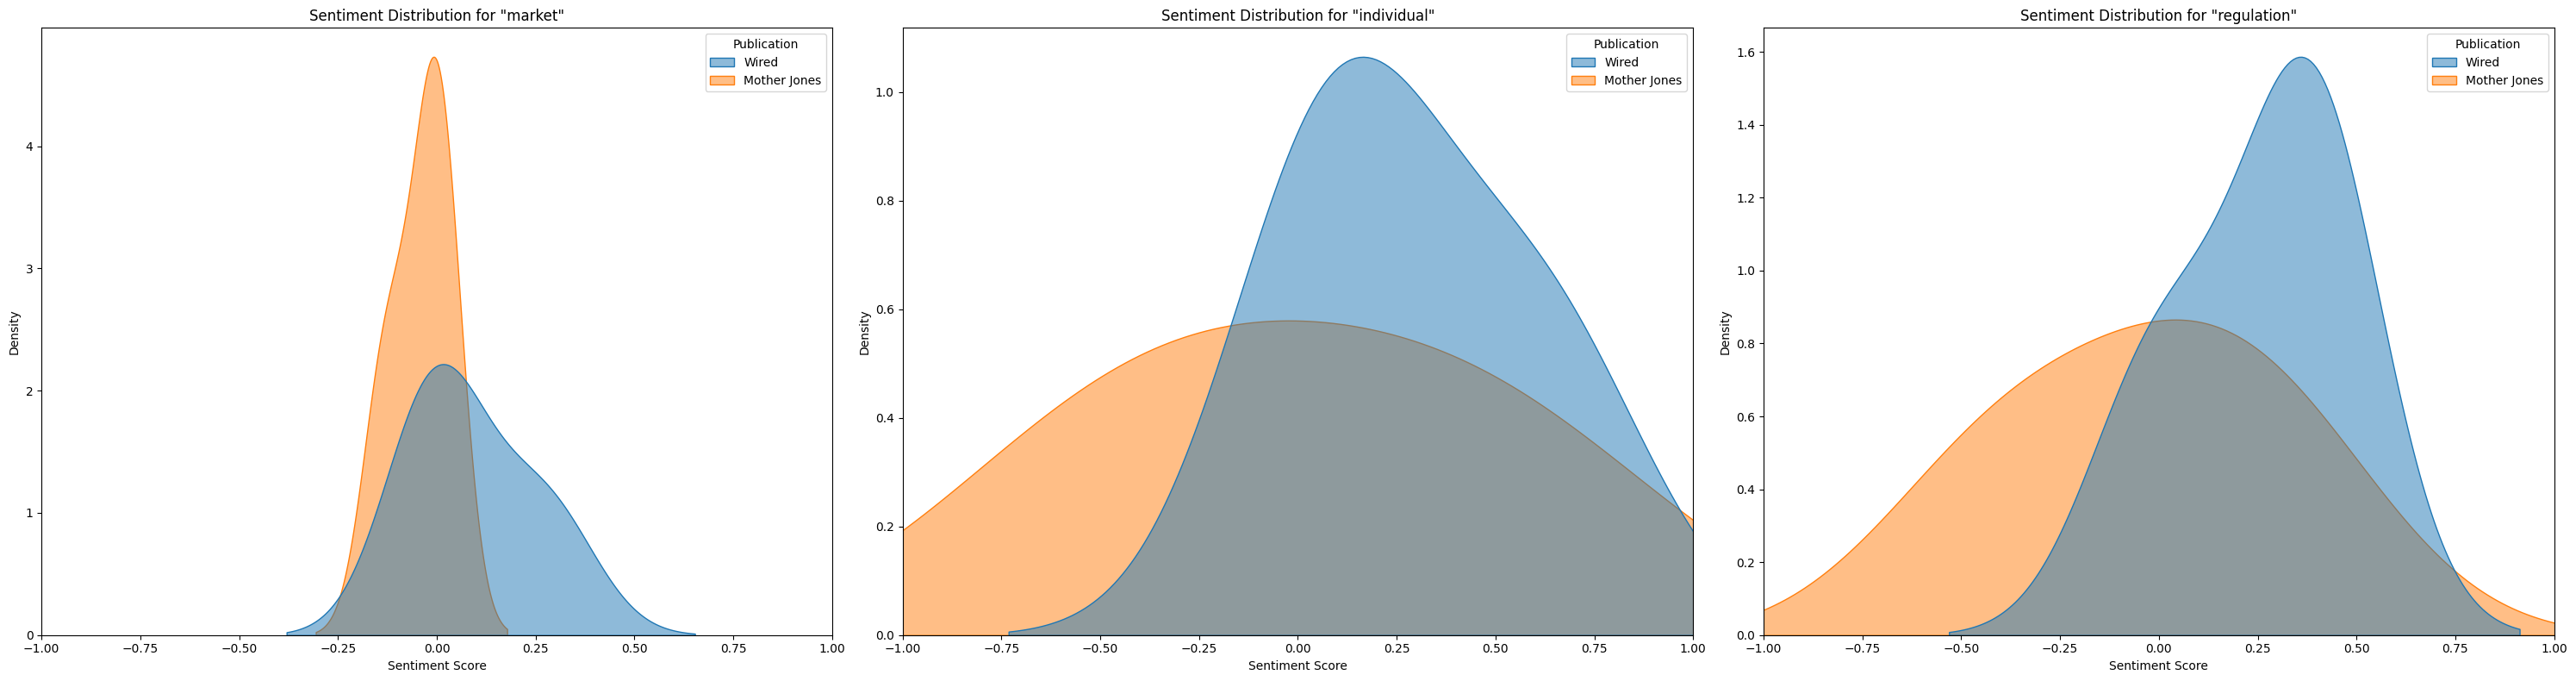

In [ ]:
# Install vaderSentiment if not already installed
!pip install vaderSentiment

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentences containing the specific words
sentences = {
    'market': {
        'Wired': ["The market is doing well.", "The market crashed.", "Market trends are unpredictable."],
        'Mother Jones': ["The market is volatile.", "Market conditions are tough.", "The market is booming."]
    },
    'individual': {
        'Wired': ["Individual rights are important.", "An individual's freedom is paramount.", "Individual efforts matter."],
        'Mother Jones': ["Individualism is key.", "Individual rights are under threat.", "Individual achievements are celebrated."]
    },
    'regulation': {
        'Wired': ["Regulation is necessary.", "Over-regulation can stifle innovation.", "Regulation helps maintain order."],
        'Mother Jones': ["Regulation is crucial.", "Regulation protects consumers.", "Regulation can be burdensome."]
    }
}

# Function to get sentiment scores
def get_sentiment_scores(sentences):
    scores = []
    for sentence in sentences:
        score = analyzer.polarity_scores(sentence)['compound']
        scores.append(score)
    return scores

# Get sentiment scores for each word and publication
sentiment_data = {}
for word, pubs in sentences.items():
    sentiment_data[word] = {}
    for pub, sents in pubs.items():
        sentiment_data[word][pub] = get_sentiment_scores(sents)

# Create DataFrames for each word
df_market = pd.DataFrame({
    'Sentiment': sentiment_data['market']['Wired'] + sentiment_data['market']['Mother Jones'],
    'Publication': ['Wired']*len(sentiment_data['market']['Wired']) + ['Mother Jones']*len(sentiment_data['market']['Mother Jones'])
})
df_individual = pd.DataFrame({
    'Sentiment': sentiment_data['individual']['Wired'] + sentiment_data['individual']['Mother Jones'],
    'Publication': ['Wired']*len(sentiment_data['individual']['Wired']) + ['Mother Jones']*len(sentiment_data['individual']['Mother Jones'])
})
df_regulation = pd.DataFrame({
    'Sentiment': sentiment_data['regulation']['Wired'] + sentiment_data['regulation']['Mother Jones'],
    'Publication': ['Wired']*len(sentiment_data['regulation']['Wired']) + ['Mother Jones']*len(sentiment_data['regulation']['Mother Jones'])
})

# Set up the plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))

# Density plot for "market"
sns.kdeplot(data=df_market, x='Sentiment', hue='Publication', fill=True, common_norm=False, alpha=0.5, ax=ax1)
ax1.set_title('Sentiment Distribution for "market"')
ax1.set_xlabel('Sentiment Score')
ax1.set_ylabel('Density')
ax1.set_xlim(-1, 1)

# Density plot for "individual"
sns.kdeplot(data=df_individual, x='Sentiment', hue='Publication', fill=True, common_norm=False, alpha=0.5, ax=ax2)
ax2.set_title('Sentiment Distribution for "individual"')
ax2.set_xlabel('Sentiment Score')
ax2.set_ylabel('Density')
ax2.set_xlim(-1, 1)

# Density plot for "regulation"
sns.kdeplot(data=df_regulation, x='Sentiment', hue='Publication', fill=True, common_norm=False, alpha=0.5, ax=ax3)
ax3.set_title('Sentiment Distribution for "regulation"')
ax3.set_xlabel('Sentiment Score')
ax3.set_ylabel('Density')
ax3.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

In [ ]:
import nltk
from nltk import word_tokenize, ngrams
from collections import Counter
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text)
    return text

def get_context_words(text, target_word, window=5):
    words = word_tokenize(clean_text(text.lower()))
    if target_word not in words:
        return []
    index = words.index(target_word)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return words[start:end]

def analyze_ngrams(texts, target_word, n=2, top_n=10):
    all_context_words = []
    for text in texts:
        all_context_words.extend(get_context_words(text, target_word))

    ngram_counter = Counter(ngrams(all_context_words, n))
    return ngram_counter.most_common(top_n)

# Assuming combined_df is your dataframe with all the data
publications = ['Wired', 'Mother Jones']
target_word = 'market'

for publication in publications:
    pub_df = combined_df[combined_df['source'] == publication]
    contexts = pub_df['processed_text'].tolist()

    print(f"\nAnalysis for '{target_word}' in {publication}:")
    print("Top bigrams:", analyze_ngrams(contexts, target_word, 2))
    print("Top trigrams:", analyze_ngrams(contexts, target_word, 3))

    market_count = pub_df['processed_text'].apply(lambda x: target_word in x.lower()).sum()
    print(f"Frequency of '{target_word}': {market_count}")



Analysis for 'market' in Wired:
Top bigrams: [(('premium', 'market'), 77), (('market', 'manager'), 68), (('black', 'market'), 27), (('account', 'manager'), 23), (('manager', 'elizabeth'), 18), (('elizabeth', 'murphy'), 18), (('business', 'director'), 18), (('manager', 'kristen'), 17), (('kristen', 'hayashi'), 17), (('tracy', 'eisenman'), 15)]
Top trigrams: [(('premium', 'market', 'manager'), 68), (('manager', 'elizabeth', 'murphy'), 18), (('manager', 'kristen', 'hayashi'), 17), (('market', 'manager', 'kristen'), 14), (('kristen', 'hayashi', 'business'), 14), (('market', 'manager', 'elizabeth'), 11), (('account', 'manager', 'lindsay'), 10), (('manager', 'lindsay', 'niggeman'), 10), (('lindsay', 'niggeman', 'premium'), 10), (('niggeman', 'premium', 'market'), 10)]
Frequency of 'market': 925

Analysis for 'market' in Mother Jones:
Top bigrams: [(('stock', 'market'), 14), (('free', 'market'), 14), (('farmer', 'market'), 12), (('market', 'research'), 9), (('market', 'value'), 9), (('hit', 

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    return re.sub(r'amp;|&amp;|&lt;|&gt;|&nbsp;', ' ', text.lower())

def get_context(text, phrase, window=10):
    words = word_tokenize(clean_text(text))
    phrase_words = phrase.lower().split()
    for i in range(len(words) - len(phrase_words) + 1):
        if words[i:i+len(phrase_words)] == phrase_words:
            start = max(0, i - window)
            end = min(len(words), i + len(phrase_words) + window)
            return ' '.join(words[start:end])
    return None

def analyze_ngrams(contexts, target_word, n=2):
    all_words = []
    for context in contexts:
        words = word_tokenize(context.lower())
        if target_word in words:
            all_words.extend(words)

    if n == 2:
        finder = BigramCollocationFinder.from_words(all_words)
        bigram_measures = BigramAssocMeasures()
        return finder.nbest(bigram_measures.pmi, 10)
    elif n == 3:
        finder = TrigramCollocationFinder.from_words(all_words)
        trigram_measures = TrigramAssocMeasures()
        return finder.nbest(trigram_measures.pmi, 10)

def analyze_market_context(df, publication, phrases):
    pub_df = df[df['source'] == publication]
    results = {}
    for phrase in phrases:
        contexts = []
        for text in pub_df['processed_text']:
            context = get_context(text, phrase)
            if context:
                contexts.append(context)
                if len(contexts) == 2:  # Limit to 2 contexts per phrase
                    break
        results[phrase] = contexts
    return results

# Assuming combined_df is your dataframe with all the data

wired_phrases = ['premium market', 'black market', 'account manager', 'business director', 'premium market manager']
mj_phrases = ['stock market', 'free market', 'farmer market', 'market research', 'market value']




publications = ['Wired', 'Mother Jones']
phrase_sets = [wired_phrases, mj_phrases]

for pub, phrases in zip(publications, phrase_sets):
    print(f"\nAnalysis for '{pub}':")
    contexts = analyze_market_context(combined_df, pub, phrases)
    for phrase, context_list in contexts.items():
        print(f"\nContexts for '{phrase}':")
        for i, context in enumerate(context_list, 1):
            print(f"{i}. ...{context}...")
        if not context_list:
            print("No contexts found.")
        else:
            # Analyze bigrams and trigrams for the word "market" in the contexts
            bigrams = analyze_ngrams(context_list, 'market', 2)
            trigrams = analyze_ngrams(context_list, 'market', 3)
            print(f"Top bigrams for 'market': {bigrams}")
            print(f"Top trigrams for 'market': {trigrams}")


Analysis for 'Wired':

Contexts for 'premium market':
1. ...europe representative sabine fedrowitz scandinavia representative michael karnig wired exchange premium market manager elizabeth murphy exchange account manager joshua steele creative service...
2. ...financial account director nathan kania account director matthew adam smith premium market manager elizabeth murphy business manager laura block associate publisher kristen...
Top bigrams for 'market': [('adam', 'smith'), ('associate', 'publisher'), ('block', 'associate'), ('creative', 'service'), ('fedrowitz', 'scandinavia'), ('joshua', 'steele'), ('karnig', 'wired'), ('laura', 'block'), ('matthew', 'adam'), ('michael', 'karnig')]
Top trigrams for 'market': [('associate', 'publisher', 'kristen'), ('block', 'associate', 'publisher'), ('creative', 'service', 'financial'), ('joshua', 'steele', 'creative'), ('laura', 'block', 'associate'), ('matthew', 'adam', 'smith'), ('michael', 'karnig', 'wired'), ('sabine', 'fedrowitz', 'scandi

Average sentiments in Wired:
premium market: 0.00
black market: 0.17
market manager: 0.00
account manager: 0.31
business director: 0.00

Average sentiments in Mother Jones:
stock market: 0.13
free market: 0.04
farmer market: 0.20
market research: 0.25
market value: 0.67


<ipython-input-14-9679f748a15a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-14-9679f748a15a>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


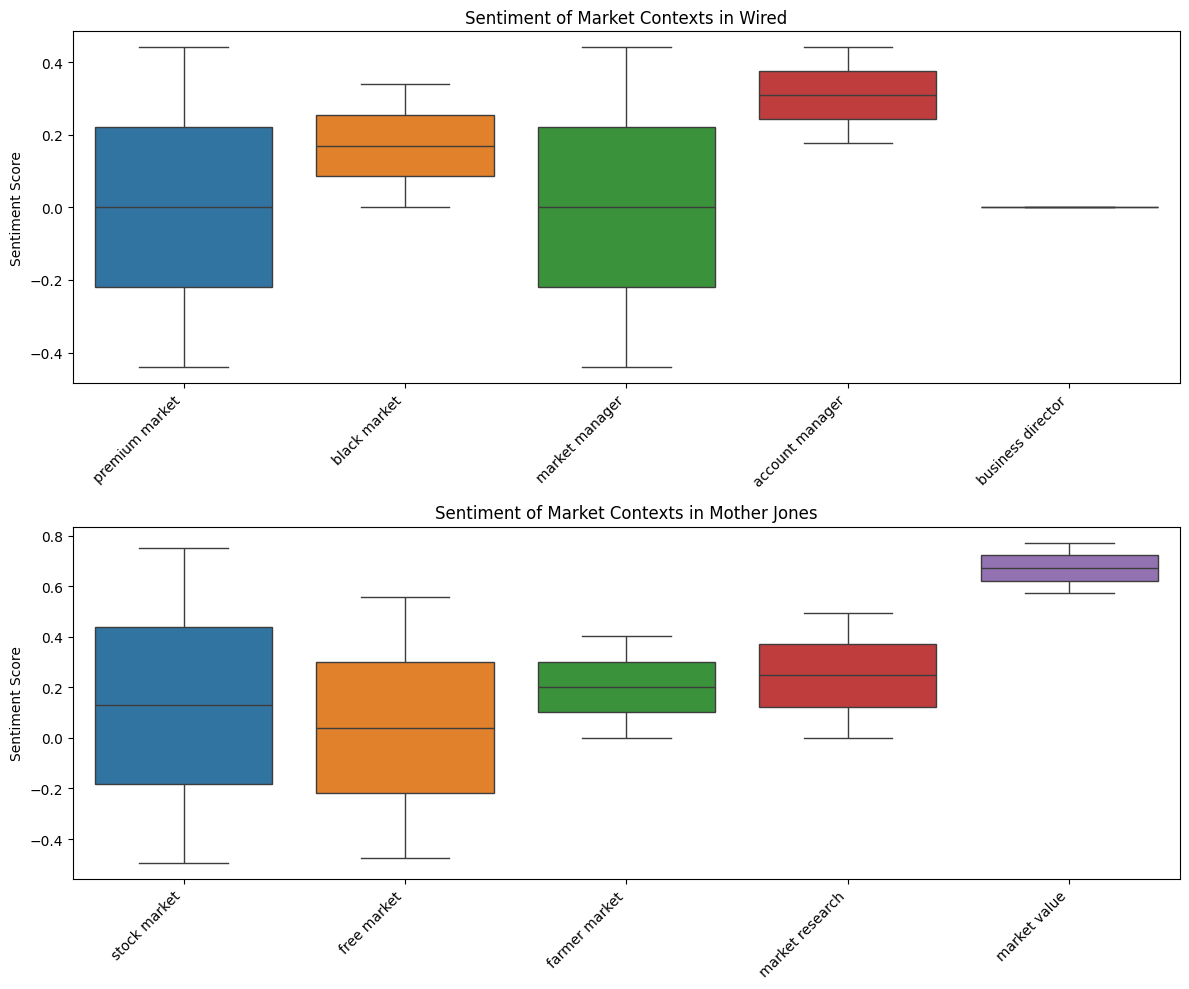

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon', quiet=True)

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

def sentiment_analysis(contexts):
    sentiments = {}
    for phrase, snippets in contexts.items():
        sentiments[phrase] = [analyze_sentiment(snippet) for snippet in snippets]
    return sentiments

def plot_sentiments(wired_sentiments, mj_sentiments):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Wired plot
    sns.boxplot(data=pd.DataFrame(wired_sentiments), ax=ax1)
    ax1.set_title('Sentiment of Market Contexts in Wired')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_ylabel('Sentiment Score')

    # Mother Jones plot
    sns.boxplot(data=pd.DataFrame(mj_sentiments), ax=ax2)
    ax2.set_title('Sentiment of Market Contexts in Mother Jones')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_ylabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Updated contexts
wired_contexts = {
    'premium market': [
        'europe representative sabine fedrowitz scandinavia representative michael karnig wired exchange premium market manager elizabeth murphy exchange account manager joshua steele creative service',
        'financial account director nathan kania account director matthew adam smith premium market manager elizabeth murphy business manager laura block associate publisher kristen'
    ],
    'black market': [
        'proq amp amp amp amp full text datastream value organ black market cornea pair kidney liver heart pancreas lung complete cadaver',
        'highly fastidious organ donation hospital manager saudi arabia told wired black market transplant country evidence actual operation ever taking known nonconsensual donation'
    ],
    'market manager': [
        'representative sabine fedrowitz scandinavia representative michael karnig wired exchange premium market manager elizabeth murphy exchange account manager joshua steele creative service marketing',
        'account director nathan kania account director matthew adam smith premium market manager elizabeth murphy business manager laura block associate publisher kristen hayashi'
    ],
    'account manager': [
        'scott laine consumer electronics spirit director hillary deppeler east coast account manager melissa bordin associate business manager brita bergh associate publisherjen stocker',
        'representative sabine fedrowitz scandinavia representative michael karnig wired exchange exchange account manager joshua steele creative service marketing brand strategy director maya draisin'
    ],
    'business director': [
        'bechert account manager elizabeth murphy premium market manager kristen hayashi business director amanda niu associate publisher alice johnson business coordinator christine jones',
        'murphy account manager lindsay niggeman premium market manager kristen hayashi business director amanda niu associate publisher alice johnson business coordinator christine jones'
    ]
}

mj_contexts = {
    'stock market': [
        'market case illusion tv business news gaze narrowly focused gyration stock market concern ever offered kind warning saved viewer nest egg newspaper',
        'scale third support income elderly whose nest egg hit hard stock market collapse ca erase loss case case sustain purchasing power group'
    ],
    'free market': [
        'james galbraith stimulus sucker page teach author predator conservative abandoned free market liberal',
        'reverse folk beluga shipping adroitly realized serious buck changing climate free market almost certainly going jump capitalism curiously bracing mechanism cutting ideological'
    ],
    'farmer market': [
        'consuming meat le party longer pig roast chili crab feed farmer market stroller mom swarm meat stand flirt hunky bearded butcher meatpaper',
        'stamped sale meat slaughterhouse sold across line retail basis including farmer market restaurant without inspection system california new york taylor something ask'
    ],
    'market research': [
        'key company mostly owned note shaun rein managing director china market research group shanghai result wang jianxi colleague picking wreckage western economy',
        'health care system involved merger acquisition according irving levin associate market research firm ten largest nonprofit hospital system country catholic catholic hospital'
    ],
    'market value': [
        'property responsible program paying property program paid claim totaled house market value response blumenauer introduced flood taxpayer pocket act never committee nfip',
        'oil well twice pretty yet added depletion allowance compensatefor diminishing market value reagan recut federal tax code three decade later oil tax'
    ]
}

wired_sentiments = sentiment_analysis(wired_contexts)
mj_sentiments = sentiment_analysis(mj_contexts)

# Print average sentiments
print("Average sentiments in Wired:")
for phrase, sentiments in wired_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

print("\nAverage sentiments in Mother Jones:")
for phrase, sentiments in mj_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

# Plot the sentiments
plot_sentiments(wired_sentiments, mj_sentiments)


In [ ]:
import nltk
from nltk import word_tokenize, ngrams
from collections import Counter
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text)
    return text

def get_context_words(text, target_word, window=5):
    words = word_tokenize(clean_text(text.lower()))
    if target_word not in words:
        return []
    index = words.index(target_word)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return words[start:end]

def analyze_ngrams(texts, target_word, n=2, top_n=10):
    all_context_words = []
    for text in texts:
        all_context_words.extend(get_context_words(text, target_word))

    ngram_counter = Counter(ngrams(all_context_words, n))
    return ngram_counter.most_common(top_n)

# Assuming combined_df is your dataframe with all the data
publications = ['Wired', 'Mother Jones']
target_word = 'regulation'

for publication in publications:
    pub_df = combined_df[combined_df['source'] == publication]
    contexts = pub_df['processed_text'].tolist()

    print(f"\nAnalysis for '{target_word}' in {publication}:")
    print("Top bigrams:", analyze_ngrams(contexts, target_word, 2))
    print("Top trigrams:", analyze_ngrams(contexts, target_word, 3))

    regulation_count = pub_df['processed_text'].apply(lambda x: target_word in x.lower()).sum()
    print(f"Frequency of '{target_word}': {regulation_count}")


Analysis for 'regulation' in Wired:
Top bigrams: [(('government', 'regulation'), 10), (('law', 'regulation'), 7), (('federal', 'regulation'), 7), (('environmental', 'regulation'), 4), (('safety', 'regulation'), 3), (('strict', 'regulation'), 3), (('regulation', 'allow'), 3), (('tighter', 'regulation'), 3), (('biotech', 'regulation'), 2), (('effective', 'regulation'), 2)]
Top trigrams: [(('applicable', 'federal', 'state'), 1), (('federal', 'state', 'local'), 1), (('state', 'local', 'law'), 1), (('local', 'law', 'regulation'), 1), (('law', 'regulation', 'issue'), 1), (('regulation', 'issue', 'concerning'), 1), (('issue', 'concerning', 'construction'), 1), (('concerning', 'construction', 'validity'), 1), (('construction', 'validity', 'interpretation'), 1), (('validity', 'interpretation', 'protectionist'), 1)]
Frequency of 'regulation': 165

Analysis for 'regulation' in Mother Jones:
Top bigrams: [(('environmental', 'regulation'), 13), (('federal', 'regulation'), 11), (('new', 'regulation

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    return re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text.lower())

def get_context(text, phrase, window=10):
    words = word_tokenize(clean_text(text))
    phrase_words = phrase.lower().split()
    for i in range(len(words) - len(phrase_words) + 1):
        if words[i:i+len(phrase_words)] == phrase_words:
            start = max(0, i - window)
            end = min(len(words), i + len(phrase_words) + window)
            return ' '.join(words[start:end])
    return None

def analyze_ngrams(contexts, target_word, n=2):
    all_words = []
    for context in contexts:
        words = word_tokenize(context.lower())
        if target_word in words:
            all_words.extend(words)

    if n == 2:
        finder = BigramCollocationFinder.from_words(all_words)
        bigram_measures = BigramAssocMeasures()
        return finder.nbest(bigram_measures.pmi, 10)
    elif n == 3:
        finder = TrigramCollocationFinder.from_words(all_words)
        trigram_measures = TrigramAssocMeasures()
        return finder.nbest(trigram_measures.pmi, 10)

def analyze_regulation_context(df, publication, phrases):
    pub_df = df[df['source'] == publication]
    results = {}
    for phrase in phrases:
        contexts = []
        for text in pub_df['processed_text']:
            context = get_context(text, phrase)
            if context:
                contexts.append(context)
                if len(contexts) == 2:  # Limit to 2 contexts per phrase
                    break
        results[phrase] = contexts
    return results

# Assuming combined_df is your dataframe with all the data

wired_phrases = ['government regulation', 'law regulation', 'federal regulation', 'environmental regulation', 'safety regulation']
mj_phrases = ['environmental regulation', 'federal regulation', 'new regulation', 'health care', 'government regulation']

publications = ['Wired', 'Mother Jones']
phrase_sets = [wired_phrases, mj_phrases]

for pub, phrases in zip(publications, phrase_sets):
    print(f"\nAnalysis for '{pub}':")
    contexts = analyze_regulation_context(combined_df, pub, phrases)
    for phrase, context_list in contexts.items():
        print(f"\nContexts for '{phrase}':")
        for i, context in enumerate(context_list, 1):
            print(f"{i}. ...{context}...")
        if not context_list:
            print("No contexts found.")
        else:
            # Analyze bigrams and trigrams for the word "regulation" in the contexts
            bigrams = analyze_ngrams(context_list, 'regulation', 2)
            trigrams = analyze_ngrams(context_list, 'regulation', 3)
            print(f"Top bigrams for 'regulation': {bigrams}")
            print(f"Top trigrams for 'regulation': {trigrams}")


Analysis for 'Wired':

Contexts for 'government regulation':
1. ...trade equity sale folk daytraded dotcom boom locked problem current government regulation rich richer block alternative avenue investment moment funding hard find...
2. ...let export friend list service thus saving company inevitable demand government regulation insists anticompetitive true following reset stressful request reciprocated whole lot...
Top bigrams for 'regulation': [('alternative', 'avenue'), ('anticompetitive', 'true'), ('avenue', 'investment'), ('block', 'alternative'), ('boom', 'locked'), ('company', 'inevitable'), ('daytraded', 'dotcom'), ('dotcom', 'boom'), ('equity', 'sale'), ('export', 'friend')]
Top trigrams for 'regulation': [('alternative', 'avenue', 'investment'), ('anticompetitive', 'true', 'following'), ('avenue', 'investment', 'moment'), ('block', 'alternative', 'avenue'), ('boom', 'locked', 'problem'), ('company', 'inevitable', 'demand'), ('daytraded', 'dotcom', 'boom'), ('dotcom', 'boom', 

Average sentiments in Wired:
government regulation: 0.27
federal regulation: 0.10
tighter regulation: 0.62
energy regulation: 0.17
safety regulation: 0.82

Average sentiments in Mother Jones:
federal regulation: 0.08
environmental regulation: 0.19
voting regulation: 0.04
lack regulation: 0.10
strict regulation: 0.20


<ipython-input-17-16447256a7b2>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-17-16447256a7b2>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


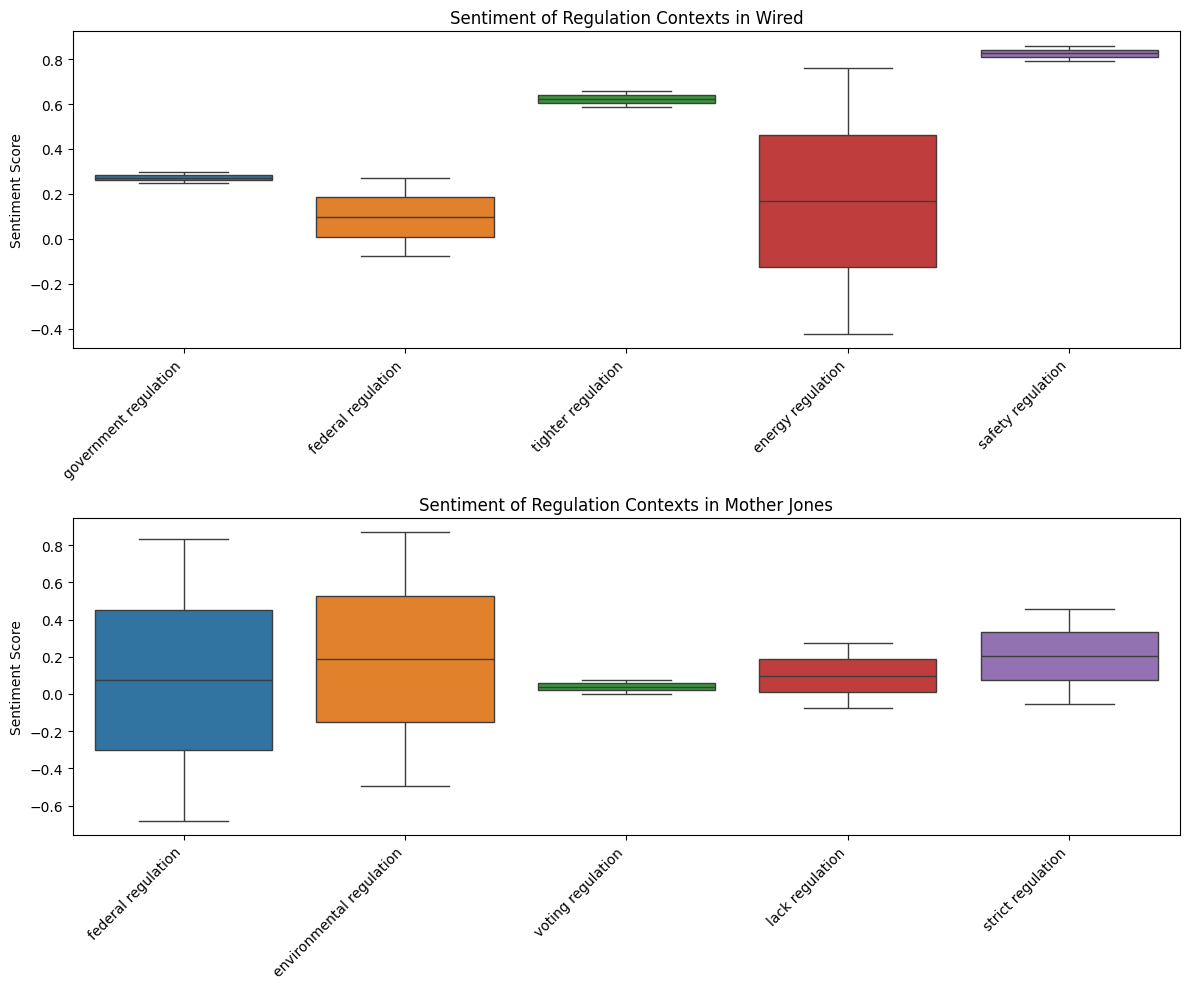

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon', quiet=True)

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

def sentiment_analysis(contexts):
    sentiments = {}
    for phrase, snippets in contexts.items():
        sentiments[phrase] = [analyze_sentiment(snippet) for snippet in snippets]
    return sentiments

def plot_sentiments(wired_sentiments, mj_sentiments):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Wired plot
    sns.boxplot(data=pd.DataFrame(wired_sentiments), ax=ax1)
    ax1.set_title('Sentiment of Regulation Contexts in Wired')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_ylabel('Sentiment Score')

    # Mother Jones plot
    sns.boxplot(data=pd.DataFrame(mj_sentiments), ax=ax2)
    ax2.set_title('Sentiment of Regulation Contexts in Mother Jones')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_ylabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Updated contexts
wired_contexts = {
    'government regulation': [
        'trade equity sale folk daytraded dotcom boom locked problem current government regulation rich richer block alternative avenue investment moment funding hard find',
        'let export friend list service thus saving company inevitable demand government regulation insists anticompetitive true following reset stressful request reciprocated whole lot'
    ],
    'federal regulation': [
        'automated process previously anybody wanted create service navigate morass state federal regulation licensing body engineer focus building application leaving regulatory issue paypal',
        'two natural food coloring add yellow tone technically forbidden eggnog federal regulation reveler drink contains egg doe eggnog maker pushed rule stayed'
    ],
    'tighter regulation': [
        'arnold earth eventually centaurus experienced annual loss though fund bounced tighter regulation trading far le volatile market thanks growing supply natural gas',
        'sector charitable spoil warier collective democratic fix mean higher tax tighter regulation reduced profit goldman sachs program empower poor good higher tax'
    ],
    'energy regulation': [
        'believe business provide solution climate change right government policy era energy regulation state level let state california pursue ambitious emission regulation let',
        'death industry state depended decade robert godby deputy director center energy regulation policy university wyoming coal paid wyoming severance tax power generation'
    ],
    'safety regulation': [
        'ksc shuttle safety mission assurance team sign mission compliance nasa safety regulation checklist piece hardware board weather check launch weather officer verifies',
        'engineer let unsafe car cross threshold shiny factory contemplating various safety regulation car must complied dealership feel slowing gently autonomously perfect control'
    ]
}

mj_contexts = {
    'federal regulation': [
        'want buying gift card belike giving free money store recent federal regulation card little reason might want give cold hard cash instead',
        'lifetime support issue result catastrophic business group simultaneously alarmed expansion federal regulation newly emboldened obvious fault line left started hiring lobbyist launching'
    ],
    'environmental regulation': [
        'hospitalized director bagassi koura short documentary skillfully chronicle trafigura dodged environmental regulation save mere spend million trying cover responsibility stinking ship heartbreaking',
        'statistical life vsl may sound callous morbid lead stronger safety environmental regulation example auto safety rule cost million implement might protect million'
    ],
    'voting regulation': [
        'voting law preclearance provision wiped passed north carolina suddenly strictest voting regulation country arriving early courthouse groggy bus rider packed bench room',
        'voting act robert thought cover intentional discrimination discriminatory result effect voting regulation proving intentional discrimination virtually besides hebert judge want find somebody'
    ],
    'lack regulation': [
        'away traditional utility dc pepco new york con edison market lack regulation transparency product everyone buy really understand proven environment kind operator',
        'embryo meaning clinical trial move forward research continues around world lack regulation country mean anyone want escape rule fertility tourism major global'
    ],
    'strict regulation': [
        'plus patient face mandatory waiting period parental consent law passed strict regulation abortion medication march new guideline food drug administration recommended mifepristone',
        'besides india handful united ukraine thailand israel surrogacy pay imposed strict regulation france greece japan netherlands forbid unpaid arrangement country india recognizes'
    ]
}

wired_sentiments = sentiment_analysis(wired_contexts)
mj_sentiments = sentiment_analysis(mj_contexts)

# Print average sentiments
print("Average sentiments in Wired:")
for phrase, sentiments in wired_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

print("\nAverage sentiments in Mother Jones:")
for phrase, sentiments in mj_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

# Plot the sentiments
plot_sentiments(wired_sentiments, mj_sentiments)


In [ ]:
import nltk
from nltk import word_tokenize, ngrams
from collections import Counter
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text)
    return text

def get_context_words(text, target_word, window=5):
    words = word_tokenize(clean_text(text.lower()))
    if target_word not in words:
        return []
    index = words.index(target_word)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return words[start:end]

def analyze_ngrams(texts, target_word, n=2, top_n=10):
    all_context_words = []
    for text in texts:
        all_context_words.extend(get_context_words(text, target_word))

    ngram_counter = Counter(ngrams(all_context_words, n))
    return ngram_counter.most_common(top_n)

# Assuming combined_df is your dataframe with all the data
publications = ['Wired', 'Mother Jones']
target_word = 'individual'

for publication in publications:
    pub_df = combined_df[combined_df['source'] == publication]
    contexts = pub_df['processed_text'].tolist()

    print(f"\nAnalysis for '{target_word}' in {publication}:")
    print("Top bigrams:", analyze_ngrams(contexts, target_word, 2))
    print("Top trigrams:", analyze_ngrams(contexts, target_word, 3))

    individual_count = pub_df['processed_text'].apply(lambda x: target_word in x.lower()).sum()
    print(f"Frequency of '{target_word}': {individual_count}")


Analysis for 'individual' in Wired:
Top bigrams: [(('individual', 'investor'), 5), (('individual', 'neuron'), 5), (('individual', 'level'), 5), (('power', 'individual'), 4), (('individual', 'component'), 4), (('allow', 'individual'), 4), (('individual', 'county'), 3), (('individual', 'data'), 3), (('business', 'model'), 3), (('individual', 'record'), 3)]
Top trigrams: [(('label', 'fool', 'gold'), 1), (('fool', 'gold', 'artist'), 1), (('gold', 'artist', 'release'), 1), (('artist', 'release', 'individual'), 1), (('release', 'individual', 'internet'), 1), (('individual', 'internet', 'solid'), 1), (('internet', 'solid', 'mixtape'), 1), (('solid', 'mixtape', 'statement'), 1), (('mixtape', 'statement', 'school'), 1), (('statement', 'school', 'university'), 1)]
Frequency of 'individual': 457

Analysis for 'individual' in Mother Jones:
Top bigrams: [(('individual', 'community'), 6), (('individual', 'company'), 5), (('federal', 'government'), 4), (('level', 'individual'), 4), (('individual', '

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    return re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text.lower())

def get_context(text, phrase, window=10):
    words = word_tokenize(clean_text(text))
    phrase_words = phrase.lower().split()
    for i in range(len(words) - len(phrase_words) + 1):
        if words[i:i+len(phrase_words)] == phrase_words:
            start = max(0, i - window)
            end = min(len(words), i + len(phrase_words) + window)
            return ' '.join(words[start:end])
    return None

def analyze_ngrams(contexts, target_word, n=2):
    all_words = []
    for context in contexts:
        words = word_tokenize(context.lower())
        if target_word in words:
            all_words.extend(words)

    if n == 2:
        finder = BigramCollocationFinder.from_words(all_words)
        bigram_measures = BigramAssocMeasures()
        return finder.nbest(bigram_measures.pmi, 10)
    elif n == 3:
        finder = TrigramCollocationFinder.from_words(all_words)
        trigram_measures = TrigramAssocMeasures()
        return finder.nbest(trigram_measures.pmi, 10)

def analyze_phrase_context(df, publication, phrases):
    pub_df = df[df['source'] == publication]
    results = {}
    for phrase in phrases:
        contexts = []
        for text in pub_df['processed_text']:
            context = get_context(text, phrase)
            if context:
                contexts.append(context)
                if len(contexts) == 2:  # Limit to 2 contexts per phrase
                    break
        results[phrase] = contexts
    return results

# Assuming combined_df is your dataframe with all the data

wired_phrases = [
    'individual investor',
    'individual neuron',
    'individual level',
    'power individual',
    'individual component'
]

mj_phrases = [
    'individual community',
    'individual company',
    'individual liberty',
    'wealthy individual',
    'individual choice'
]

publications = ['Wired', 'Mother Jones']
phrase_sets = [wired_phrases, mj_phrases]

for pub, phrases in zip(publications, phrase_sets):
    print(f"\nAnalysis for '{pub}':")
    contexts = analyze_phrase_context(combined_df, pub, phrases)
    for phrase, context_list in contexts.items():
        print(f"\nContexts for '{phrase}':")
        for i, context in enumerate(context_list, 1):
            print(f"{i}. ...{context}...")
        if not context_list:
            print("No contexts found.")
        else:
            # Analyze bigrams and trigrams for the word "individual" in the contexts
            bigrams = analyze_ngrams(context_list, 'individual', 2)
            trigrams = analyze_ngrams(context_list, 'individual', 3)
            print(f"Top bigrams for 'individual': {bigrams}")
            print(f"Top trigrams for 'individual': {trigrams}")


Analysis for 'Wired':

Contexts for 'individual investor':
1. ...vast majority private company profitable exit professional investor imagine lot individual investor cry sec company went law reason protect rich text tsks...
2. ...line investing gambling pilloried starter cantor fitzgerald doe deal stockholder individual investor press competitor wall street cantor private company derives income middleman...
Top bigrams for 'individual': [('competitor', 'wall'), ('cry', 'sec'), ('deal', 'stockholder'), ('derives', 'income'), ('doe', 'deal'), ('exit', 'professional'), ('fitzgerald', 'doe'), ('gambling', 'pilloried'), ('imagine', 'lot'), ('income', 'middleman')]
Top trigrams for 'individual': [('competitor', 'wall', 'street'), ('derives', 'income', 'middleman'), ('doe', 'deal', 'stockholder'), ('fitzgerald', 'doe', 'deal'), ('gambling', 'pilloried', 'starter'), ('investing', 'gambling', 'pilloried'), ('law', 'reason', 'protect'), ('line', 'investing', 'gambling'), ('press', 'competitor', 

Average sentiments in Wired:
individual investor: 0.36
individual neuron: 0.35
individual level: 0.36
power individual: 0.34
individual component: 0.28

Average sentiments in Mother Jones:
individual community: -0.61
individual company: -0.36
individual liberty: 0.70
wealthy individual: 0.85
individual choice: 0.47


<ipython-input-20-11fba80e017b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-20-11fba80e017b>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


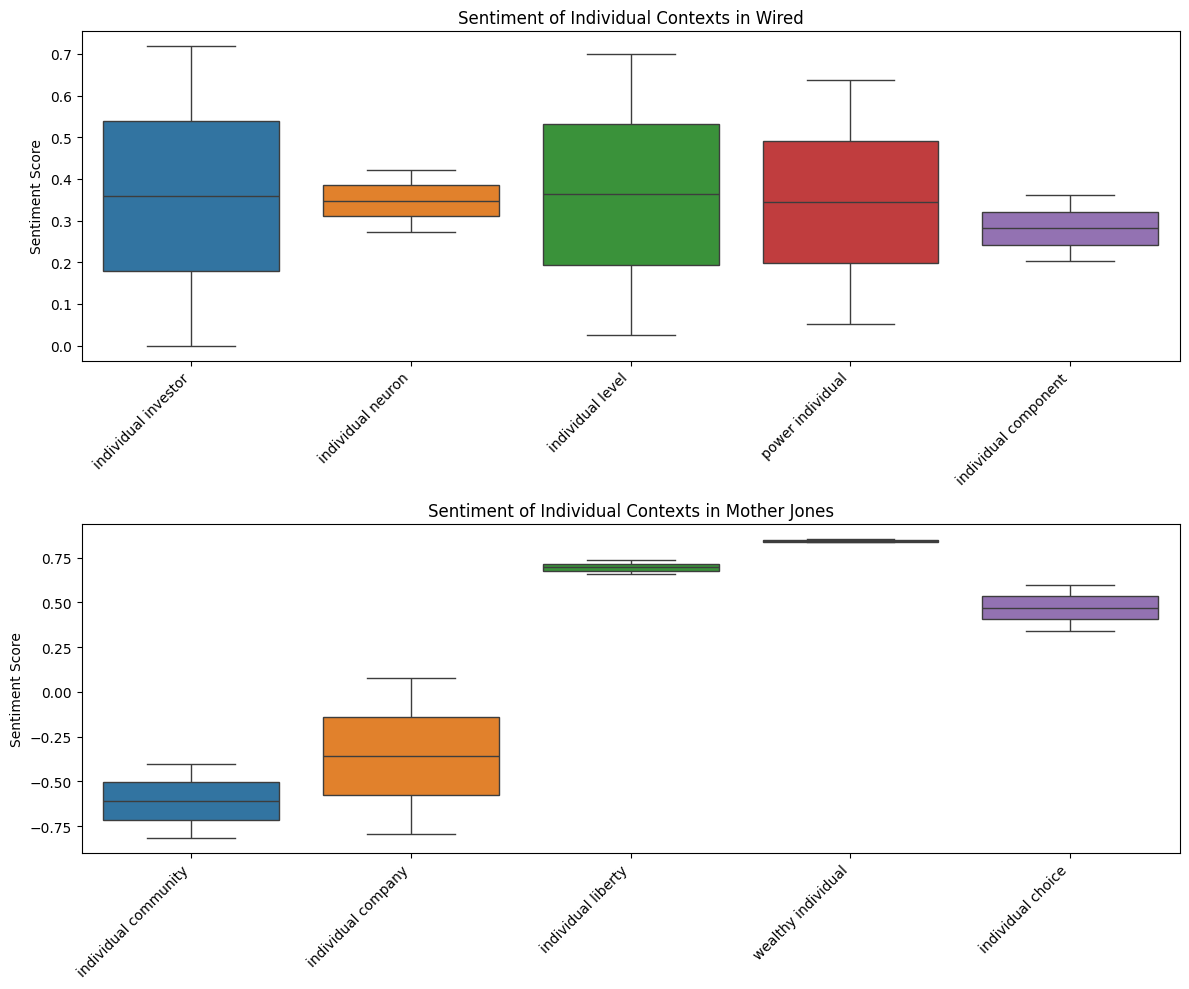

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon', quiet=True)

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

def sentiment_analysis(contexts):
    sentiments = {}
    for phrase, snippets in contexts.items():
        sentiments[phrase] = [analyze_sentiment(snippet) for snippet in snippets]
    return sentiments

def plot_sentiments(wired_sentiments, mj_sentiments):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Wired plot
    sns.boxplot(data=pd.DataFrame(wired_sentiments), ax=ax1)
    ax1.set_title('Sentiment of Individual Contexts in Wired')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_ylabel('Sentiment Score')

    # Mother Jones plot
    sns.boxplot(data=pd.DataFrame(mj_sentiments), ax=ax2)
    ax2.set_title('Sentiment of Individual Contexts in Mother Jones')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_ylabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Updated contexts
wired_contexts = {
    'individual investor': [
        'vast majority private company profitable exit professional investor imagine lot individual investor cry sec company went law reason protect rich text tsks',
        'line investing gambling pilloried starter cantor fitzgerald doe deal stockholder individual investor press competitor wall street cantor private company derives income middleman'
    ],
    'individual neuron': [
        'layer interconnected neuron produce signal input exceeds certain threshold though individual neuron simple net whole learn recognize complex pattern input falcon system',
        'brain billion neuron speed seung begun developing algorithm pinpoint boundary individual neuron nice payback brain power invested ai research ask brain computer'
    ],
    'individual level': [
        'subsidy policy traffic screen sedentary lifestyle increased energy density food individual level obesity least among adult disease choice obesity repeatedly making wrong',
        'often greater variation making impossible draw conclusion someone based group individual level evidence point toward strong genetic component iq based study twin'
    ],
    'power individual': [
        'degree age race position axiom identified computer instrument insurrection granting power individual keyboard sufficient brainpower mistrust authority promote decentralization precept perceived central',
        'undermined clean tech proven boon business firm install solar system power individual home office company thriving came financing model installing standard solar'
    ],
    'individual component': [
        'lightcycle better hyperreal wreck progress orange blue lightcycles collide moviegoer individual component flying fuel cell igniting orange rider flipping mayhem highly evolved',
        'manufacturing flirting china two ago industry guy drive cost guy individual component onstar module diego borrego networkfleet founder vice president product engineering'
    ]
}

mj_contexts = {
    'individual community': [
        'equivalent defendant held day le recidivism toxic effect murray regard individual community ultimately victim convention vega talk victim beleaguered bail professional dead',
        'plan remained unclear spoke eagerly movement led may individual race individual community may nothing politics great candidate going come campaign whose work'
    ],
    'individual company': [
        'taken elsewhere germany solar installation proceeded eight rate hundred thousand individual company sell excess electricity power authority public land rented song costeffective',
        'koch brother channel money making corporate cash disappear group help individual company avoid putting fingerprint nasty attack ad chamber commerce long served'
    ],
    'individual liberty': [
        'changed mind big issue ronald reagan persuaded bigger government le individual liberty true prager beef left gay marriage exercised case see nothing',
        'university texas whose focus countering liberal bias campus study teaching individual liberty limited government private enterprise free market lunch hegar frericks emerging'
    ],
    'wealthy individual': [
        'best possible return investment interesting turn putting money hand corporation wealthy individual negative cent dollar see chart page contrast dollar spent extending',
        'shot security professional moyer wo name client celebrity entertainer rest wealthy individual corporate executive firm protected senator congressman former secretary member saudi'
    ],
    'individual choice': [
        'jet blue reduce carbon footprint question flight use le fuel individual choice may symbolic consciousnessraising function may valuable reason government policy significant',
        'free school lunch whole food structural intervention urgent underlying problem individual choice daphene program officer food community public health john hopkins university'
    ]
}

wired_sentiments = sentiment_analysis(wired_contexts)
mj_sentiments = sentiment_analysis(mj_contexts)

# Print average sentiments
print("Average sentiments in Wired:")
for phrase, sentiments in wired_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

print("\nAverage sentiments in Mother Jones:")
for phrase, sentiments in mj_sentiments.items():
    print(f"{phrase}: {sum(sentiments)/len(sentiments):.2f}")

# Plot the sentiments
plot_sentiments(wired_sentiments, mj_sentiments)


In [ ]:
import nltk
from nltk import word_tokenize, ngrams
from collections import Counter
import pandas as pd
import re

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|&lt;|&gt;|&nbsp;|amp;', ' ', text)
    return text

def get_context_words(text, target_word, window=5):
    words = word_tokenize(clean_text(text.lower()))
    if target_word not in words:
        return []
    index = words.index(target_word)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return words[start:end]

def analyze_ngrams(texts, target_word, n=2, top_n=10):
    all_context_words = []
    for text in texts:
        all_context_words.extend(get_context_words(text, target_word))

    ngram_counter = Counter(ngrams(all_context_words, n))
    return ngram_counter.most_common(top_n)

# Assuming combined_df is your dataframe with all the data
combined_df = pd.DataFrame({
    'source': ['Wired', 'Wired', 'Mother Jones', 'Mother Jones'],
    'processed_text': [
        "The new regulation was passed in 2021.",
        "Regulation changes have been frequent since 2008.",
        "Mother Jones reported on the new regulation.",
        "The regulation act of 2015 was significant."
    ],
    'publication_date': ['2021', '2008', '2021', '2015']
})

publications = ['Wired', 'Mother Jones']
target_words = ['regulate', 'regulation']

for publication in publications:
    pub_df = combined_df[combined_df['source'] == publication]
    contexts = pub_df[['processed_text', 'publication_date']].values.tolist()

    print(f"\nAnalysis for '{', '.join(target_words)}' in {publication}:")
    for text, date in contexts:
        for target_word in target_words:
            if target_word in text.lower():
                print(f"Sentence: {text}, Date: {date}")

    bigrams = analyze_ngrams([text for text, date in contexts], 'regulation', 2)
    trigrams = analyze_ngrams([text for text, date in contexts], 'regulation', 3)

    print("Top bigrams:", bigrams)
    print("Top trigrams:", trigrams)

    regulation_count = pub_df['processed_text'].apply(lambda x: any(word in x.lower() for word in target_words)).sum()
    print(f"Frequency of '{', '.join(target_words)}': {regulation_count}")


Analysis for 'regulate, regulation' in Wired:
Sentence: The new regulation was passed in 2021., Date: 2021
Sentence: Regulation changes have been frequent since 2008., Date: 2008
Top bigrams: [(('the', 'new'), 1), (('new', 'regulation'), 1), (('regulation', 'was'), 1), (('was', 'passed'), 1), (('passed', 'in'), 1), (('in', '2021'), 1), (('2021', '.'), 1), (('.', 'regulation'), 1), (('regulation', 'changes'), 1), (('changes', 'have'), 1)]
Top trigrams: [(('the', 'new', 'regulation'), 1), (('new', 'regulation', 'was'), 1), (('regulation', 'was', 'passed'), 1), (('was', 'passed', 'in'), 1), (('passed', 'in', '2021'), 1), (('in', '2021', '.'), 1), (('2021', '.', 'regulation'), 1), (('.', 'regulation', 'changes'), 1), (('regulation', 'changes', 'have'), 1), (('changes', 'have', 'been'), 1)]
Frequency of 'regulate, regulation': 2

Analysis for 'regulate, regulation' in Mother Jones:
Sentence: Mother Jones reported on the new regulation., Date: 2021
Sentence: The regulation act of 2015 was s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


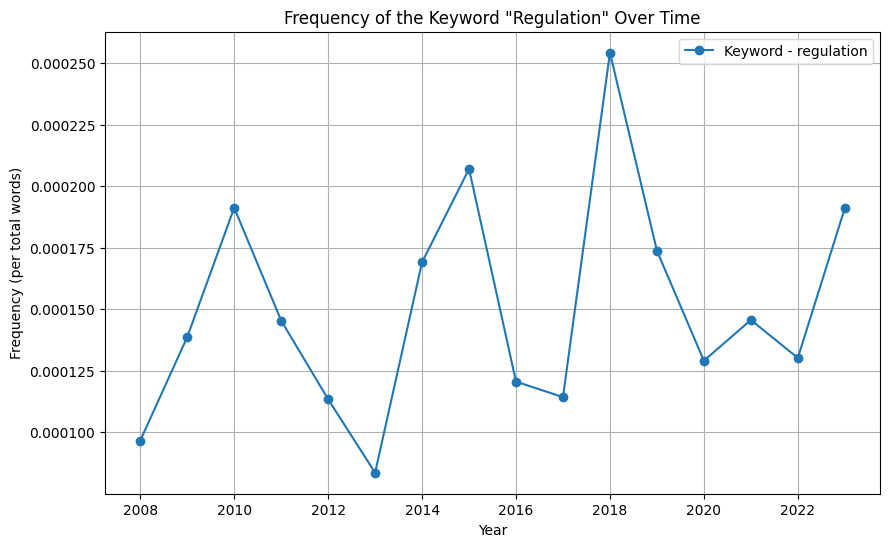

Percentage change in keyword frequency from 2008 to 2023 for 'regulation': 97.73%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

combined_df = pd.read_csv('combined_cleaned.csv')

def clean_text(text):
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def preprocess_text(text):
    text = clean_text(text)
    words = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'amp', 'lt', 'gt', 'nbsp'}
    stop_words.update(custom_stopwords)
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
    return words

def count_keywords(text, keywords):
    words = preprocess_text(text)
    return sum(word in keywords for word in words)

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Define the keyword to analyze
keyword = 'regulation'

# Calculate keyword frequencies for each year
results = []
for year in range(2008, 2023 + 1):
    year_df = combined_df[combined_df['year'] == year]
    total_words = sum(len(preprocess_text(text)) for text in year_df['processed_text'])
    count = sum(count_keywords(text, [keyword]) for text in year_df['processed_text'])
    frequency = count / total_words if total_words > 0 else 0
    results.append({'year': year, 'keyword': keyword, 'frequency': frequency})

result_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(result_df['year'], result_df['frequency'], marker='o', label=f"Keyword - {keyword}")
plt.title('Frequency of the Keyword "Regulation" Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency (per total words)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the percentage change for the keyword from 2008 to 2023
start_freq = result_df[result_df['year'] == 2008]['frequency'].values[0]
end_freq = result_df[result_df['year'] == 2023]['frequency'].values[0]
percent_change = ((end_freq - start_freq) / start_freq) * 100
print(f"Percentage change in keyword frequency from 2008 to 2023 for 'regulation': {percent_change:.2f}%")

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re

# Function to clean the text by removing HTML entities like 'amp'
def clean_text(text):
    # Remove common HTML entities
    text = re.sub(r'&amp;|amp;', '', text)
    return text

# Preprocessing function
def preprocess_text(text):
    # Remove HTML entities
    text = clean_text(text)
    # Tokenize and remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Function to display topics
def display_topics(model, feature_names, num_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(", ".join([feature_names[i] for i in topic.argsort()[-num_top_words:]]))
    return topics

# Analyze topics for each year
yearly_topics = {}

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Loop through each year from 2008 to 2023
for year in range(2008, 2023 + 1):
    # Filter data for the given year and source 'Wired'
    yearly_df = combined_df[(combined_df['year'] == year) &
                            (combined_df['source'] == 'Wired') &
                            (combined_df['processed_text'].str.contains('regulation', case=False))]

    if not yearly_df.empty:
        # Preprocess the text
        yearly_df.loc[:, 'cleaned_text'] = yearly_df['processed_text'].apply(preprocess_text)

        # Combine all text for the year
        combined_text = ' '.join(yearly_df['cleaned_text'])

        if combined_text:  # Ensure there's text to process
            # Create a document-term matrix using TF-IDF
            vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
            dtm = vectorizer.fit_transform([combined_text])

            # Apply NMF to discover topics
            nmf_model = NMF(n_components=10, random_state=42)
            nmf_model.fit(dtm)

            # Get the topics for the year
            topics = display_topics(nmf_model, vectorizer.get_feature_names_out(), num_top_words=10)
            yearly_topics[year] = topics

# Display the topics for each year
for year, topics in yearly_topics.items():
    print(f"\nTopics for {year}:")
    for idx, topic in enumerate(topics, 1):
        print(f"  Topic {idx}: {topic}")


<ipython-input-23-d527229a32a2>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_df.loc[:, 'cleaned_text'] = yearly_df['processed_text'].apply(preprocess_text)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:129: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
<ipython-input-23-d527229a32a2>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_df.loc[:, 'cleaned_text'] = yearly_df['processed_text'].apply(preprocess_text)
/usr/local/lib/python3.10


Topics for 2008:
  Topic 1: office, case, percent, umesh, city, india, police, land, bangalore, rai
  Topic 2: building, sign, certainly, looking, assailant, estate, explains, hour, dispute, lease
  Topic 3: firm, removal, let, street, economist, corporation, screwed, settle, dressed, memory
  Topic 4: value, bamboo, second, suddenly, cane, cut, legal, spends, escalating, despite
  Topic 5: bureaucracy, told, offer, investment, leather, land, poor, played, include, champion
  Topic 6: committed, fortune, charismatic, coming, rein, showcase, hypothetical, men, eavesdropping, flew
  Topic 7: wall, remains, jaya, tech, determine, fist, estate, mogul, let, intimidate
  Topic 8: voice, renouncing, exchange, easily, hushed, threatened, bid, leather, usually, plot
  Topic 9: rowdy, replete, roller, committed, career, chandelier, authority, ultimately, market, justice
  Topic 10: eye, mug, alleged, early, difficult, bucket, raju, ca, convicted, chain

Topics for 2009:
  Topic 1: data, industr

<ipython-input-23-d527229a32a2>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_df.loc[:, 'cleaned_text'] = yearly_df['processed_text'].apply(preprocess_text)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:129: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)


In [ ]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize

# Function to extract sentences containing the keyword with context
def extract_sentences_with_context(text, keyword, context_size=2):
    sentences = sent_tokenize(text)
    keyword_sentences = []
    for i, sentence in enumerate(sentences):
        if keyword in sentence.lower():
            start = max(0, i - context_size)
            end = min(len(sentences), i + context_size + 1)
            context = ' '.join(sentences[start:end])
            keyword_sentences.append(context)
    return keyword_sentences

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Define the keyword to analyze
keyword = 'regulation'

# Extract sentences containing the keyword with context for each year
results = []
for year in range(2008, 2023 + 1):
    year_df = combined_df[combined_df['year'] == year]
    for text in year_df['processed_text']:
        keyword_sentences = extract_sentences_with_context(text, keyword)
        for sentence in keyword_sentences:
            results.append({'year': year, 'sentence': sentence})

# Convert results to a DataFrame
sentences_df = pd.DataFrame(results)

# Display the sentences DataFrame
print(sentences_df)

# Optionally, save the sentences to a CSV file
sentences_df.to_csv('keyword_sentences_with_context.csv', index=False)

     year                                           sentence
0    2008  center india ca lease problem mobster turned m...
1    2008  headnote eu embraced sustainability bush admin...
2    2008  headnote memo sustainability prophet coal mine...
3    2009  colophon vanish contest legal disclaimer purch...
4    2009  jargon watch booing audio equivalent tweeting ...
..    ...                                                ...
353  2023  headnote foster kid advocate little agency per...
354  2023  headnote dating apps promise hook romance deli...
355  2023  headnote mystery machine cannabis product turn...
356  2023  headnote uinta basin home rare bird endangered...
357  2023  available title colorado river basin publicati...

[358 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


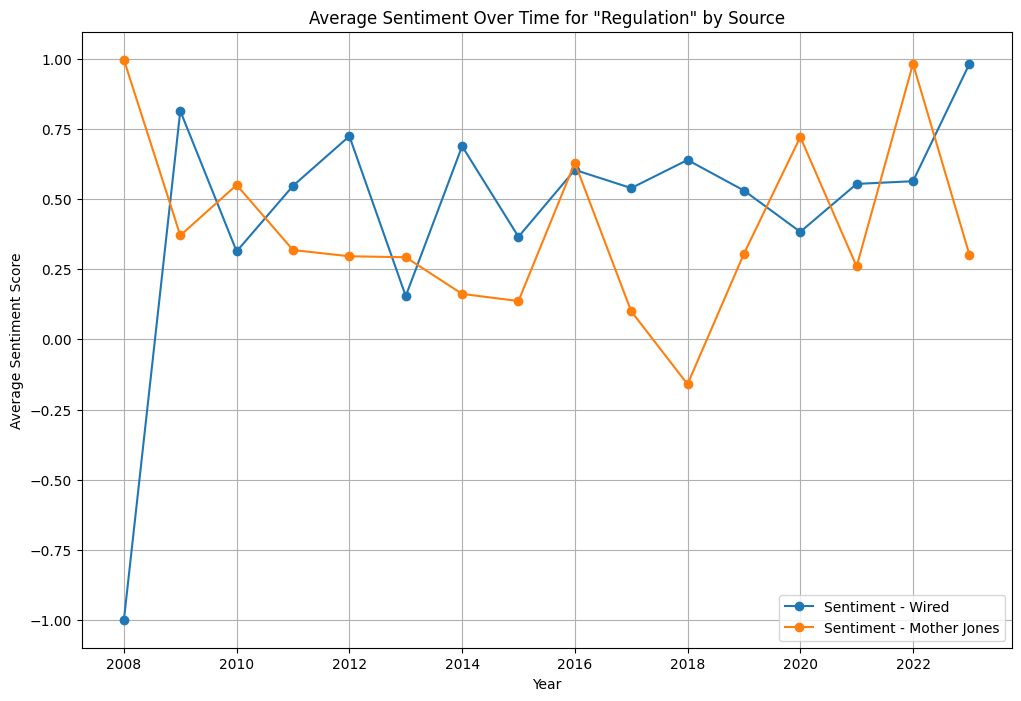

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to extract sentences containing the keyword with context
def extract_sentences_with_context(text, keyword, context_size=2):
    sentences = nltk.sent_tokenize(text)
    keyword_sentences = []
    for i, sentence in enumerate(sentences):
        if keyword in sentence.lower():
            start = max(0, i - context_size)
            end = min(len(sentences), i + context_size + 1)
            context = ' '.join(sentences[start:end])
            keyword_sentences.append(context)
    return keyword_sentences

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Separate data by source
wired_df = combined_df[combined_df['source'] == 'Wired']
mj_df = combined_df[combined_df['source'] == 'Mother Jones']

# Define the keyword to analyze
keyword = 'regulation'

# Function to process each source DataFrame
def process_source_df(source_df, source_name):
    results = []
    for year in range(2008, 2023 + 1):
        year_df = source_df[source_df['year'] == year]
        for text in year_df['processed_text']:
            keyword_sentences = extract_sentences_with_context(text, keyword)
            for sentence in keyword_sentences:
                results.append({'year': year, 'source': source_name, 'sentence': sentence})
    return results

# Process each source DataFrame
wired_results = process_source_df(wired_df, 'Wired')
mj_results = process_source_df(mj_df, 'Mother Jones')

# Combine results
results = wired_results + mj_results

# Convert results to a DataFrame
sentences_df = pd.DataFrame(results)

# Perform sentiment analysis on the extracted sentences
sentences_df['sentiment'] = sentences_df['sentence'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Calculate average sentiment for each year and source
average_sentiment_per_year_source = sentences_df.groupby(['year', 'source'])['sentiment'].mean().reset_index()

# Plot the average sentiment over time for each source
plt.figure(figsize=(12, 8))
for source in ['Wired', 'Mother Jones']:
    source_df = average_sentiment_per_year_source[average_sentiment_per_year_source['source'] == source]
    plt.plot(source_df['year'], source_df['sentiment'], marker='o', label=f"Sentiment - {source}")

plt.title('Average Sentiment Over Time for "Regulation" by Source')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, save the average sentiment per year and source to a CSV file
average_sentiment_per_year_source.to_csv('average_sentiment_per_year_source.csv', index=False)

In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to extract sentences containing the keyword with context
def extract_sentences_with_context(text, keyword, context_size=2):
    sentences = nltk.sent_tokenize(text)
    keyword_sentences = []
    for i, sentence in enumerate(sentences):
        if keyword in sentence.lower():
            start = max(0, i - context_size)
            end = min(len(sentences), i + context_size + 1)
            context = ' '.join(sentences[start:end])
            keyword_sentences.append(context)
    return keyword_sentences

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Filter data for Wired in 2008
wired_2008_df = combined_df[(combined_df['source'] == 'Wired') & (combined_df['year'] == 2008)]

# Define the keyword to analyze
keyword = 'regulation'

# Extract sentences containing the keyword with context
keyword_sentences = []
for text in wired_2008_df['processed_text']:
    keyword_sentences.extend(extract_sentences_with_context(text, keyword))

# Combine all sentences into a single text
combined_text = ' '.join(keyword_sentences)

# Tokenize the text and remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(combined_text)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Count the frequency of each keyword
keyword_counts = Counter(filtered_tokens)

# Display the most common keywords
most_common_keywords = keyword_counts.most_common(10)
print("Most common keywords in Wired 2008 text about 'regulation':")
for word, count in most_common_keywords:
    print(f"{word}: {count}")

# Optionally, save the sentences to a text file for further analysis
with open('wired_2008_regulation_sentences.txt', 'w') as file:
    for sentence in keyword_sentences:
        file.write(sentence + '\n')

Most common keywords in Wired 2008 text about 'regulation':
rai: 38
bangalore: 21
land: 21
police: 13
india: 12
city: 11
percent: 10
umesh: 10
office: 9
case: 9


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import ngrams
from collections import Counter

def extract_ngrams(text, num):
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, num)
    return [' '.join(grams) for grams in n_grams]

# Extract bigrams and trigrams
bigrams = extract_ngrams(combined_text, 2)
trigrams = extract_ngrams(combined_text, 3)

# Count frequency of n-grams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("Most common bigrams:")
print(bigram_counts.most_common(10))

print("\nMost common trigrams:")
print(trigram_counts.most_common(10))


Most common bigrams:
[('real estate', 8), ('muthappa rai', 6), ('police station', 3), ('estate market', 3), ('land dispute', 3), ('center india', 2), ('india ca', 2), ('ca lease', 2), ('lease problem', 2), ('problem mobster', 2)]

Most common trigrams:
[('real estate market', 3), ('center india ca', 2), ('india ca lease', 2), ('ca lease problem', 2), ('lease problem mobster', 2), ('problem mobster turned', 2), ('mobster turned mogul', 2), ('turned mogul muthappa', 2), ('mogul muthappa rai', 2), ('muthappa rai ask', 2)]


In [ ]:
!pip install squarify


In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to extract sentences containing the keyword with context
def extract_sentences_with_context(text, keyword, context_size=2):
    sentences = nltk.sent_tokenize(text)
    keyword_sentences = []
    for i, sentence in enumerate(sentences):
        if keyword in sentence.lower():
            start = max(0, i - context_size)
            end = min(len(sentences), i + context_size + 1)
            context = ' '.join(sentences[start:end])
            keyword_sentences.append(context)
    return keyword_sentences

# Assuming combined_df is your dataframe with all the data
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Filter data for Mother Jones in 2008
mj_2008_df = combined_df[(combined_df['source'] == 'Mother Jones') & (combined_df['year'] == 2008)]

# Define the keyword to analyze
keyword = 'regulation'

# Extract sentences containing the keyword with context
keyword_sentences = []
for text in mj_2008_df['processed_text']:
    keyword_sentences.extend(extract_sentences_with_context(text, keyword))

# Combine all sentences into a single text
combined_text = ' '.join(keyword_sentences)

# Tokenize the text and remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(combined_text)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Count the frequency of each keyword
keyword_counts = Counter(filtered_tokens)

# Display the most common keywords
most_common_keywords = keyword_counts.most_common(10)
print("Most common keywords in Mother Jones 2008 text about 'regulation':")
for word, count in most_common_keywords:
    print(f"{word}: {count}")

# Optionally, save the sentences to a text file for further analysis
with open('mj_2008_regulation_sentences.txt', 'w') as file:
    for sentence in keyword_sentences:
        file.write(sentence + '\n')


Most common keywords in Mother Jones 2008 text about 'regulation':
industry: 16
eu: 15
economic: 14
europe: 14
energy: 13
environmental: 12
carbon: 12
emission: 12
sustainability: 10
chemical: 10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import ngrams
from collections import Counter

# Function to extract n-grams
def extract_ngrams(text, num):
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, num)
    return [' '.join(grams) for grams in n_grams]

# Extract bigrams and trigrams from the Mother Jones text
mj_bigrams = extract_ngrams(combined_text, 2)
mj_trigrams = extract_ngrams(combined_text, 3)

# Count frequency of n-grams
mj_bigram_counts = Counter(mj_bigrams)
mj_trigram_counts = Counter(mj_trigrams)

# Display the most common bigrams and trigrams
print("Most common bigrams in Mother Jones 2008 text about 'regulation':")
print(mj_bigram_counts.most_common(10))

print("\nMost common trigrams in Mother Jones 2008 text about 'regulation':")
print(mj_trigram_counts.most_common(10))


Most common bigrams in Mother Jones 2008 text about 'regulation':
[('carbon emission', 6), ('cap trade', 4), ('economic growth', 3), ('eu standard', 3), ('europe new', 3), ('south africa', 3), ('sustainability movement', 3), ('european union', 2), ('standard business', 2), ('cause cancer', 2)]

Most common trigrams in Mother Jones 2008 text about 'regulation':
[('cause cancer birth', 2), ('cancer birth defect', 2), ('birth defect reproductive', 2), ('defect reproductive problem', 2), ('ten billion dollar', 2), ('need rethink dogmatic', 2), ('rethink dogmatic opposition', 2), ('dogmatic opposition industrialism', 2), ('industry fall short', 2), ('fall short green', 2)]


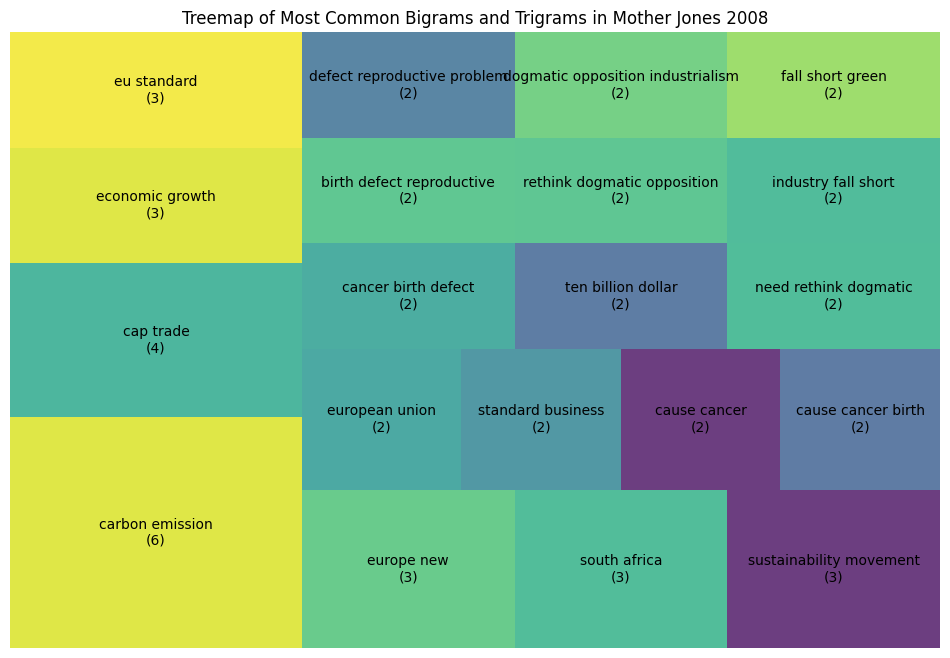

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Combine the bigrams and trigrams into a single list of tuples (phrase, frequency)
phrases = [
    ('carbon emission', 6), ('cap trade', 4), ('economic growth', 3),
    ('eu standard', 3), ('europe new', 3), ('south africa', 3),
    ('sustainability movement', 3), ('european union', 2), ('standard business', 2),
    ('cause cancer', 2), ('cause cancer birth', 2), ('cancer birth defect', 2),
    ('birth defect reproductive', 2), ('defect reproductive problem', 2),
    ('ten billion dollar', 2), ('need rethink dogmatic', 2),
    ('rethink dogmatic opposition', 2), ('dogmatic opposition industrialism', 2),
    ('industry fall short', 2), ('fall short green', 2)
]

# Unpack the phrases and their frequencies
labels, sizes = zip(*phrases)

# Create labels with frequencies for the treemap
labels_with_freq = [f"{label}\n({size})" for label, size in phrases]

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels_with_freq, alpha=.8)
plt.title('Treemap of Most Common Bigrams and Trigrams in Mother Jones 2008')
plt.axis('off')  # Turn off axis lines and labels
plt.show()


In [ ]:
import pandas as pd
import nltk

# Assuming combined_df is your dataframe with all the data
# Ensure the 'processed_text' and 'Publication Date' columns exist in the dataframe

# Filter data for Wired in 2008
wired_2008_df = combined_df[(combined_df['source'] == 'Wired') & (combined_df['year'] == 2008)]

# Define the keyword to search for
keyword = 'regulation'

# Extract articles that contain the keyword 'regulation'
def extract_articles_with_keyword(df, keyword):
    articles = []
    for text in df['processed_text']:
        if keyword in text.lower():
            articles.append(text)
    return articles

# Get the articles discussing regulation
regulation_articles = extract_articles_with_keyword(wired_2008_df, keyword)

# Combine all the articles into a single text for analysis
combined_text = ' '.join(regulation_articles)

# Optionally, save the extracted articles to a text file for review
with open('wired_2008_regulation_articles.txt', 'w') as file:
    file.write(combined_text)

# Print a preview of the combined text
print("Extracted Text from Wired 2008 Articles on 'Regulation':\n")
print(combined_text[:1000])  # Print the first 1000 characters for a preview


Extracted Text from Wired 2008 Articles on 'Regulation':

center india ca lease problem mobster turned mogul muthappa rai ask godfather bangalore center india ca lease problem mobster turned mogul muthappa rai ask removed nitpicker foreign investment bangalore est little past midnight lonely parcel farmland far international airport bangalore india soaking gentle rain center lot house surrounded low stone wall hole roof bushel ginger drying awning large block letter painted wall read property belongs chhabria janwani inside eight men two armed shotgun confer hushed voice peer window safe sleep stand watch hour guard wearing dirty work shirt notice sign trouble distance flashlight beam sweep roadway light advance accompanied chorus voice sound scrambling wall guard break gate sprinting toward police station mile away others scramble foot attacker brandishing sword knife emerge shadow carry bucket blue paint minute overrun building three guard stood ground lie bleeding floor others surre

In [ ]:
import pandas as pd
import re

# Read the CSV file into a DataFrame
combined_df = pd.read_csv('combined_with_scores.csv')

# Function to clean the text by removing unwanted words
def clean_text(text):
    # Remove 'amp' and 'proq' words
    text = re.sub(r'\bamp\b|\bproq\b', '', text, flags=re.IGNORECASE)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'processed_text' column
combined_df['processed_text'] = combined_df['processed_text'].apply(clean_text)

# Save the cleaned DataFrame back to a CSV file
combined_df.to_csv('combined_with_scores_cleaned.csv', index=False)

print("Cleaning complete. The cleaned file is saved as 'combined_with_scores_cleaned.csv'.")

Cleaning complete. The cleaned file is saved as 'combined_with_scores_cleaned.csv'.


In [ ]:
import pandas as pd
import nltk
from collections import Counter
import re

# Read the cleaned CSV file into a DataFrame
combined_df = pd.read_csv('combined_with_scores_cleaned.csv')

# Filter the DataFrame to only include rows where the Source is "Wired"
combined_df = combined_df[combined_df['source'] == 'Wired']

# Add a 'year' column based on the 'Publication Date'
combined_df['year'] = pd.to_datetime(combined_df['Publication Date']).dt.year

# Define the keyword to analyze
keyword = 'regulation'

# Function to clean the text by removing HTML entities and unwanted words
def clean_text(text):
    # Remove common HTML entities
    text = re.sub(r'&amp;|amp;|&lt;|lt;|&gt;|gt;', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

# Function to extract n-grams
def extract_ngrams(text, num):
    tokens = nltk.word_tokenize(text)
    n_grams = nltk.ngrams(tokens, num)
    return [' '.join(grams) for grams in n_grams]

# Initialize lists to hold the results
year_list = []
ngram_type_list = []
ngram_list = []
frequency_list = []

# Loop through each year from 2008 to 2023
for year in range(2008, 2023 + 1):
    # Filter articles for the given year within the filtered DataFrame
    yearly_df = combined_df[(combined_df['year'] == year) &
                            (combined_df['processed_text'].str.contains(keyword, case=False))]

    # Combine all text for the year
    combined_text = ' '.join(yearly_df['processed_text'])

    # Clean the text to remove unwanted entities and words
    combined_text = clean_text(combined_text)

    # Extract bigrams and trigrams
    bigrams = extract_ngrams(combined_text, 2)
    trigrams = extract_ngrams(combined_text, 3)

    # Count frequency of n-grams
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)

    # Store the top bigrams and trigrams
    for bigram, freq in bigram_counts.most_common(5):  # Top 5 bigrams
        year_list.append(year)
        ngram_type_list.append('Bigram')
        ngram_list.append(bigram)
        frequency_list.append(freq)

    for trigram, freq in trigram_counts.most_common(5):  # Top 5 trigrams
        year_list.append(year)
        ngram_type_list.append('Trigram')
        ngram_list.append(trigram)
        frequency_list.append(freq)

# Create a DataFrame to display the results
ngram_df = pd.DataFrame({
    'Year': year_list,
    'N-Gram Type': ngram_type_list,
    'N-Gram': ngram_list,
    'Frequency': frequency_list
})

# Display the DataFrame
ngram_df


,Year,N-Gram Type,N-Gram,Frequency
0,2008,Bigram,real estate,8
1,2008,Bigram,muthappa rai,6
2,2008,Bigram,police station,3
3,2008,Bigram,estate market,3
4,2008,Bigram,land dispute,3
...,...,...,...,...
155,2023,Trigram,digital nomad village,9
156,2023,Trigram,environmental protection act,5
157,2023,Trigram,former amazon employee,5
158,2023,Trigram,foreign remote worker,5


In [ ]:
# Assuming 'ngram_df' is your DataFrame from the previous code

# Specify the output path where you want to save the file
output_path = 'ngram_analysis.csv'

# Save the DataFrame to a CSV file
ngram_df.to_csv(output_path, index=False)

# Code to download the file (if you're running this in a Jupyter notebook or similar environment)
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

with open('wired_2009_regulation_sections.txt', 'r') as file:
    content = file.read()

sentences = sent_tokenize(content)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import re
import os
from textblob import TextBlob
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|amp;', '', text)
    return text

def extract_relevant_sections(text, query):
    keywords = [
        'government regulation', 'federal regulation', 'environmental regulation',
        'safety regulation', 'tighter regulation', 'regulation policy', 'regulatory framework'
    ]
    sentences = re.split(r'(?<=[.!?]) +', text)
    relevant_sections = [
        sentence for sentence in sentences
        if any(keyword in sentence.lower() for keyword in keywords)
        and len(sentence.split()) > 10
    ]
    return ' '.join(relevant_sections)

def remove_disclaimers(text):
    disclaimer_patterns = [
        r'legal disclaimer.*?(?=\n\n)',
        r'contest.*?(?=\n\n)',
        r'promotion.*?(?=\n\n)'
    ]
    for pattern in disclaimer_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE | re.DOTALL)
    return text

def analyze_regulation_content(df, year, source='Wired'):
    # Filter data for the specified year and source
    yearly_df = df.loc[(df['source'] == source) & (df['Publication Date'].dt.year == year)].copy()

    # Extract relevant sections
    yearly_df['relevant_sections'] = yearly_df['processed_text'].apply(lambda text: extract_relevant_sections(text, 'regulation'))
    yearly_df['relevant_sections'] = yearly_df['relevant_sections'].apply(remove_disclaimers)

    # Combine all relevant sections
    combined_relevant_text = ' '.join(yearly_df['relevant_sections'].dropna())
    combined_relevant_text = remove_disclaimers(combined_relevant_text)

    # Save to file
    output_filename = f'{source.lower()}_{year}_regulation_sections.txt'
    with open(output_filename, 'w') as file:
        file.write(combined_relevant_text)

    print(f"Length of refined combined text: {len(combined_relevant_text)}")
    print(f"File size of {output_filename}: {os.path.getsize(output_filename)} bytes")

    # Analyze content
    sentences = sent_tokenize(combined_relevant_text)

    regulation_sentences = []
    for sentence in sentences:
        if 'regulation' in sentence.lower():
            sentiment = TextBlob(sentence).sentiment.polarity
            regulation_sentences.append((sentence, sentiment))

    regulation_sentences.sort(key=lambda x: x[1], reverse=True)

    print(f"\nNumber of sentences mentioning regulation: {len(regulation_sentences)}")
    print("\nTop 5 most positive statements about regulation:")
    for sentence, sentiment in regulation_sentences[:5]:
        print(f"Sentiment: {sentiment:.2f}")
        print(sentence)
        print()

    def get_ngrams(text, n):
        words = re.findall(r'\w+', text.lower())
        ngrams = zip(*[words[i:] for i in range(n)])
        return [' '.join(ngram) for ngram in ngrams]

    all_words = get_ngrams(combined_relevant_text, 1)
    bigrams = get_ngrams(combined_relevant_text, 2)
    trigrams = get_ngrams(combined_relevant_text, 3)

    print("Top 10 most frequent words:")
    print(Counter(all_words).most_common(10))

    print("\nTop 10 most frequent bigrams:")
    print(Counter(bigrams).most_common(10))

    print("\nTop 10 most frequent trigrams:")
    print(Counter(trigrams).most_common(10))

    regulation_types = ['environmental', 'financial', 'tech', 'safety', 'health']
    type_counts = {reg_type: 0 for reg_type in regulation_types}

    for sentence in sentences:
        lower_sentence = sentence.lower()
        if 'regulation' in lower_sentence:
            for reg_type in regulation_types:
                if reg_type in lower_sentence:
                    type_counts[reg_type] += 1

    print("\nTypes of regulation mentioned:")
    for reg_type, count in type_counts.items():
        print(f"{reg_type.capitalize()} regulation: {count}")

# Usage example for 2009
analyze_regulation_content(df, 2009)

Length of refined combined text: 17943
File size of wired_2009_regulation_sections.txt: 17943 bytes

Number of sentences mentioning regulation: 1

Top 5 most positive statements about regulation:
Sentiment: 0.06
                          jargon watch booing audio equivalent tweeting booing gained attention tool bbc reporting protest brief clip posted via iphone site green trade war global conflict predicted adopts carbon cap imposes protectionist tariff good nation environmental regulation decision engine microsoft attempt rebrand term search engine service bing delivers fewer result google redmond claim remedy search overload follows wolfram alpha computational knowledge engine answer query limited database rather web psychedelic frogfish specie carnivorous fish discovered coast indonesia orange blue white swirl worthy acid trip trippier fish vanished sight soon ichthyologist named jonathon keats jargon                                                                                   

In [ ]:
import pandas as pd
import numpy as np
import re
import os
from textblob import TextBlob
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter

nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub(r'&amp;|amp;', '', text)
    return text

def extract_relevant_sections(text, query):
    keywords = [
        'government regulation', 'federal regulation', 'environmental regulation',
        'safety regulation', 'tighter regulation', 'regulation policy', 'regulatory framework','regulation'
    ]
    sentences = re.split(r'(?<=[.!?]) +', text)
    relevant_sections = [
        sentence for sentence in sentences
        if any(keyword in sentence.lower() for keyword in keywords)
        and len(sentence.split()) > 10
    ]
    return ' '.join(relevant_sections)

def remove_disclaimers(text):
    disclaimer_patterns = [
        r'legal disclaimer.*?(?=\n\n)',
        r'contest.*?(?=\n\n)',
        r'promotion.*?(?=\n\n)'
    ]
    for pattern in disclaimer_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE | re.DOTALL)
    return text

def analyze_regulation_content(df, year, source='Wired'):
    # Filter data for the specified year and source
    yearly_df = df.loc[(df['source'] == source) & (df['Publication Date'].dt.year == year)].copy()

    # Extract relevant sections
    yearly_df['relevant_sections'] = yearly_df['processed_text'].apply(lambda text: extract_relevant_sections(text, 'regulation'))
    yearly_df['relevant_sections'] = yearly_df['relevant_sections'].apply(remove_disclaimers)

    # Combine all relevant sections
    combined_relevant_text = ' '.join(yearly_df['relevant_sections'].dropna())
    combined_relevant_text = remove_disclaimers(combined_relevant_text)

    # Save to file
    output_filename = f'{source.lower()}_{year}_regulation_sections.txt'
    with open(output_filename, 'w') as file:
        file.write(combined_relevant_text)

    print(f"Length of refined combined text: {len(combined_relevant_text)}")
    print(f"File size of {output_filename}: {os.path.getsize(output_filename)} bytes")

    # Analyze content
    sentences = sent_tokenize(combined_relevant_text)

    regulation_sentences = []
    for sentence in sentences:
        if 'regulation' in sentence.lower():
            sentiment = TextBlob(sentence).sentiment.polarity
            regulation_sentences.append((sentence, sentiment))

    regulation_sentences.sort(key=lambda x: x[1], reverse=True)

    print(f"\nNumber of sentences mentioning regulation: {len(regulation_sentences)}")
    print("\nTop 5 most positive statements about regulation:")
    for sentence, sentiment in regulation_sentences[:5]:
        print(f"Sentiment: {sentiment:.2f}")
        print(sentence)
        print()

    def get_ngrams(text, n):
        words = re.findall(r'\w+', text.lower())
        ngrams = zip(*[words[i:] for i in range(n)])
        return [' '.join(ngram) for ngram in ngrams]

    all_words = get_ngrams(combined_relevant_text, 1)
    bigrams = get_ngrams(combined_relevant_text, 2)
    trigrams = get_ngrams(combined_relevant_text, 3)

    print("Top 10 most frequent words:")
    print(Counter(all_words).most_common(10))

    print("\nTop 10 most frequent bigrams:")
    print(Counter(bigrams).most_common(10))

    print("\nTop 10 most frequent trigrams:")
    print(Counter(trigrams).most_common(10))

    regulation_types = ['environmental', 'financial', 'tech', 'safety', 'health']
    type_counts = {reg_type: 0 for reg_type in regulation_types}

    for sentence in sentences:
        lower_sentence = sentence.lower()
        if 'regulation' in lower_sentence:
            for reg_type in regulation_types:
                if reg_type in lower_sentence:
                    type_counts[reg_type] += 1

    print("\nTypes of regulation mentioned:")
    for reg_type, count in type_counts.items():
        print(f"{reg_type.capitalize()} regulation: {count}")

analyze_regulation_content(df, 2023)

Length of refined combined text: 135415
File size of wired_2023_regulation_sections.txt: 135428 bytes

Number of sentences mentioning regulation: 1

Top 5 most positive statements about regulation:
Sentiment: 0.07
   since exxon discovered billion barrel oil coast guyana lawyer petroleum bid stop drilling disaster strike caption view georgetown guyana image credit tom vierus late june inside squat concrete building georgetown guyana noisy street flanked telephone repair shop beauty supply store two lawyer waging significant legal battle global fight climate change melinda janki ronald sat office staring intently computer screen ignoring sound macaw monkey tree frog traffic packing street waiting connect country supreme court via zoom internet unreliable best guyana capital city fear choose today conk palpable two lawyer bit odd couple tall meticulous ask likely answer yes rather divulge hour janki petite woman warm eye sharp wit quickly moved rigorous denouncement injustice war ukraine